In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import * # For global titile using fig.suptitle

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 8, 5
pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'plotly'

In [ ]:
LS09Cand =pd.read_csv("C:\\Users\\anand\\Desktop\\data sets\\datasets_2965_4980_LS2009Candidate.csv")
LS14Cand =pd.read_csv("C:\\Users\\anand\\Desktop\\data sets\\datasets_2965_4980_LS2014Candidate.csv")

In [184]:
LS09Cand.shape
LS09Cand.head()


ST_CODE      State name  Month  Year  PC Number   PC name PC Type  \
0     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   
1     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   
2     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   
3     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   
4     S01  Andhra Pradesh      3  2009          1  Adilabad      ST   

         Candidate Name Candidate Sex Candidate Category  Candidate Age  \
0         RATHOD RAMESH             M                 ST           43.0   
1         KOTNAK RAMESH             M                 ST           39.0   
2       MESRAM NAGO RAO             M                 ST           59.0   
3           ADE TUKARAM             M                 ST           55.0   
4  RATHOD SADASHIV NAIK             M                 ST           50.0   

  Party Abbreviation  Total Votes Polled  Position  
0                TDP            372268.0       1.0  
1                INC            257181.0       2.0  
2               PRAP            112930.0       3.0  
3                BJP             57931.0       4.0  
4                BSP             16471.0       5.0

In [185]:
LS09Cand.columns

Index(['ST_CODE', 'State name', 'Month', 'Year', 'PC Number', 'PC name',
       'PC Type', 'Candidate Name', 'Candidate Sex', 'Candidate Category',
       'Candidate Age', 'Party Abbreviation', 'Total Votes Polled',
       'Position'],
      dtype='object')

In [186]:

LS14Cand.head()

ST_CODE      State name  Month  Year  PC Number    PC name PC Type  \
0     S01  Andhra Pradesh      5  2014          1  Adilabad       ST   
1     S01  Andhra Pradesh      5  2014          1  Adilabad       ST   
2     S01  Andhra Pradesh      5  2014          1  Adilabad       ST   
3     S01  Andhra Pradesh      5  2014          1  Adilabad       ST   
4     S01  Andhra Pradesh      5  2014          1  Adilabad       ST   

     Candidate Name Candidate Sex Candidate Category  Candidate Age  \
0      GODAM NAGESH             M                 ST           49.0   
1            NARESH             M                 ST           37.0   
2     RAMESH RATHOD             M                 ST           48.0   
3   RATHOD SADASHIV             M                 ST           55.0   
4  NETHAWATH RAMDAS             M                 ST           44.0   

  Party Abbreviation  Total Votes Polled  Position  
0                TRS              430847         1  
1                INC              259557         2  
2                TDP              184198         3  
3                BSP               94420         4  
4                IND               41032         5

In [187]:
LS14Cand.columns

Index(['ST_CODE', 'State name', 'Month', 'Year', 'PC Number', 'PC name',
       'PC Type', 'Candidate Name', 'Candidate Sex', 'Candidate Category',
       'Candidate Age', 'Party Abbreviation', 'Total Votes Polled',
       'Position'],
      dtype='object')

In [188]:
#Merging 2009 & 2014 Candidate datasets on one another
LS0914Cand = pd.concat([LS09Cand,LS14Cand])
print(LS0914Cand)
LS0914Cand.columns

     ST_CODE      State name  Month  Year  PC Number     PC name PC Type  \
0        S01  Andhra Pradesh      3  2009          1    Adilabad      ST   
1        S01  Andhra Pradesh      3  2009          1    Adilabad      ST   
2        S01  Andhra Pradesh      3  2009          1    Adilabad      ST   
3        S01  Andhra Pradesh      3  2009          1    Adilabad      ST   
4        S01  Andhra Pradesh      3  2009          1    Adilabad      ST   
...      ...             ...    ...   ...        ...         ...     ...   
8789     U07      Puducherry      5  2014          1  Puducherry     GEN   
8790     U07      Puducherry      5  2014          1  Puducherry     GEN   
8791     U07      Puducherry      5  2014          1  Puducherry     GEN   
8792     U07      Puducherry      5  2014          1  Puducherry     GEN   
8793     U07      Puducherry      5  2014          1  Puducherry     GEN   

                    Candidate Name Candidate Sex Candidate Category  \
0               

Index(['ST_CODE', 'State name', 'Month', 'Year', 'PC Number', 'PC name',
       'PC Type', 'Candidate Name', 'Candidate Sex', 'Candidate Category',
       'Candidate Age', 'Party Abbreviation', 'Total Votes Polled',
       'Position'],
      dtype='object')

In [104]:
#Checking all political parties abbreviation so that we can make it conscise by including alliance & significant parties
LS0914Cand['Party Abbreviation'].unique()

array(['TDP', 'INC', 'PRAP', 'BJP', 'BSP', 'IND', 'TRS', 'MCPI(S)',
       'PPOI', 'RPI(A)', 'LSP', 'TPPP', 'IJP', 'BSP(AP)', 'BPD', 'SP',
       'RKSP', 'MUL', 'ANC', 'UWF', 'SAP', 'AJBP', 'AIMIM', 'JD(S)',
       'MANP', 'GRIP', 'SJP(R)', 'CPI', 'CPM', 'RJD', 'BSSP', 'BHSASP',
       'JD(U)', 'RPI', 'RDHP', 'RDMP', 'CPI(ML)(L)', 'PBHP', 'RPI(KH)',
       'RPC(S)', 'BCUF', 'BJSH', 'RRS', nan, 'LB', 'AC', 'PPA', 'AUDF',
       'ASDC', 'NCP', 'RWS', 'BOPF', 'AGP', 'RVNP', 'LJP', 'RCPI(R)',
       'RSPS', 'AIMF', 'JMM', 'BVM', 'AIFB', 'SHS', 'LTSD', 'BJKVP',
       'BLPGL', 'BJJD', 'RSP', 'RPP', 'JGP', 'KSVP', 'RKJP', 'RJJM',
       'ABAS', 'ABJS', 'RSWD', 'AD', 'RMEP', 'PTSS', 'LPSP', 'SBSP',
       'SJTP', 'BMF', 'SLP(L)', 'KVSP', 'ABDBM', 'NBNP', 'BHJAP',
       'BSP(K)', 'JVM', 'BSKP', 'LM', 'JPS', 'EKSP', 'BUDM', 'BJKD',
       'JKM', 'PMSP', 'SSD', 'AJSP', 'RLD', 'STPI', 'MAG', 'UGDP', 'SGF',
       'BNJD', 'MJP', 'LSWP', 'VHS', 'NLHP', 'KKJHS', 'NSCP', 'RSP(S)',
       'ABMSD', 'S

In [105]:
#Introducing Alliance column for optimized substitution of Winning Party Abbreviation column
LS0914Cand['Alliance']=LS0914Cand['Party Abbreviation']
LS0914Cand['Alliance']=LS0914Cand['Alliance'].replace(to_replace=['INC','NCP', 'RJD', 'DMK', 'IUML', 'JMM','JD(s)','KC(M)','RLD','RSP','CMP(J)','KC(J)','PPI','MD'],value='UPA')
LS0914Cand['Alliance']=LS0914Cand['Alliance'].replace(to_replace=['BJP','SS', 'LJP', 'SAD', 'RLSP', 'AD','PMK','NPP','AINRC','NPF','RPI(A)','BPF','JD(U)','SDF','NDPP','MNF','RIDALOS','KMDK','IJK','PNK','JSP','GJM','MGP','GFP','GVP','AJSU','IPFT','MPP','KPP','JKPC','KC(T)','BDJS','AGP','JSS','PPA','UDP','HSPDP','PSP','JRS','KVC','PNP','SBSP','KC(N)','PDF','MDPF'],value='NDA')
LS0914Cand['Alliance']=LS0914Cand['Alliance'].replace(to_replace=['YSRCP','AAAP', 'IND', 'AIUDF', 'BLSP', 'JKPDP', 'JD(S)', 'INLD', 'CPI', 'AIMIM', 'KEC(M)','SWP', 'NPEP', 'JKN', 'AIFB', 'MUL', 'AUDF', 'BOPF', 'BVA', 'HJCBL', 'JVM','MDMK'],value='Others')
LS0914Cand

ST_CODE      State name  Month  Year  PC Number     PC name PC Type  \
0        S01  Andhra Pradesh      3  2009          1    Adilabad      ST   
1        S01  Andhra Pradesh      3  2009          1    Adilabad      ST   
2        S01  Andhra Pradesh      3  2009          1    Adilabad      ST   
3        S01  Andhra Pradesh      3  2009          1    Adilabad      ST   
4        S01  Andhra Pradesh      3  2009          1    Adilabad      ST   
...      ...             ...    ...   ...        ...         ...     ...   
8789     U07      Puducherry      5  2014          1  Puducherry     GEN   
8790     U07      Puducherry      5  2014          1  Puducherry     GEN   
8791     U07      Puducherry      5  2014          1  Puducherry     GEN   
8792     U07      Puducherry      5  2014          1  Puducherry     GEN   
8793     U07      Puducherry      5  2014          1  Puducherry     GEN   

                    Candidate Name Candidate Sex Candidate Category  \
0                    RATHOD RAMESH             M                 ST   
1                    KOTNAK RAMESH             M                 ST   
2                  MESRAM NAGO RAO             M                 ST   
3                      ADE TUKARAM             M                 ST   
4             RATHOD SADASHIV NAIK             M                 ST   
...                            ...           ...                ...   
8789          PUVALA NAGESWARA RAO             M                GEN   
8790                     G. PALANI             M                GEN   
8791            MARIE UTHRIANATHAN             M                GEN   
8792                 S. CHITRAKALA             F                GEN   
8793  P. DHANARASU @ MATHIMAHARAJA             M                GEN   

      Candidate Age Party Abbreviation  Total Votes Polled  Position  \
0              43.0                TDP            372268.0       1.0   
1              39.0                INC            257181.0       2.0   
2              59.0               PRAP            112930.0       3.0   
3              55.0                BJP             57931.0       4.0   
4              50.0                BSP             16471.0       5.0   
...             ...                ...                 ...       ...   
8789           60.0                IND               465.0      27.0   
8790           59.0         CPI(ML)(L)               438.0      28.0   
8791           32.0                SAP               366.0      29.0   
8792           37.0              JD(U)               309.0      30.0   
8793           50.0                IND               198.0      31.0   

        Alliance  
0            TDP  
1            UPA  
2           PRAP  
3            NDA  
4            BSP  
...          ...  
8789      Others  
8790  CPI(ML)(L)  
8791         SAP  
8792         NDA  
8793      Others  

[16864 rows x 15 columns]

In [106]:
# Winning seats distribution by Major Political Parties & Alliances for 2009 & 2014
SeatsWin = LS0914Cand[(LS0914Cand.Position==1)].groupby(['Alliance','Year'])['Position'].sum().reset_index().pivot(index='Alliance', columns='Year',values='Position').reset_index().fillna(0).sort_values([2014,2009], ascending=False).reset_index(drop = True)
# Removing Index Name
#SeatsWin = pd.DataFrame(data=SeatsWin.values,columns=['Alliance','2009','2014'])
print(SeatsWin['Alliance'].unique())
SeatsWin

['NDA' 'UPA' 'ADMK' 'Others' 'AITC' 'BJD' 'SHS' 'TDP' 'TRS' 'CPM' 'SP'
 'BSP']


Year Alliance   2009   2014
0         NDA  143.0  300.0
1         UPA  245.0   59.0
2        ADMK    9.0   37.0
3      Others   32.0   34.0
4        AITC   19.0   34.0
5         BJD   14.0   20.0
6         SHS   11.0   18.0
7         TDP    6.0   16.0
8         TRS    2.0   11.0
9         CPM   16.0    9.0
10         SP   23.0    5.0
11        BSP   21.0    0.0

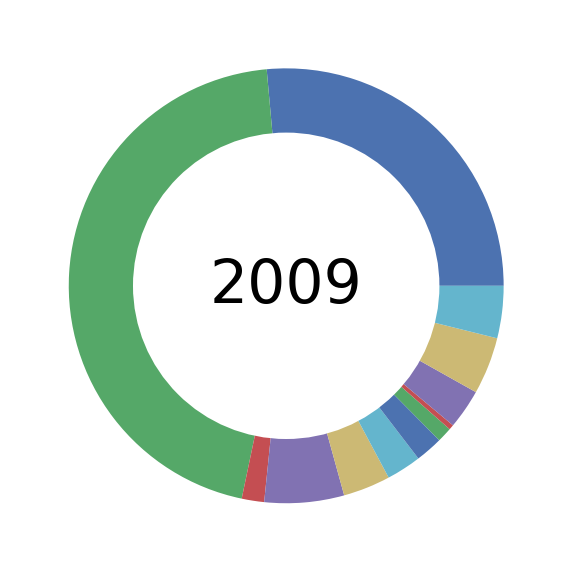

In [107]:
#plotting pie chart
plt.pie(SeatsWin[2009])
#plt.show()
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
#fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
fig = plt.gcf() #gcf means get current figure
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle)

label = ax.annotate("2009", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show()

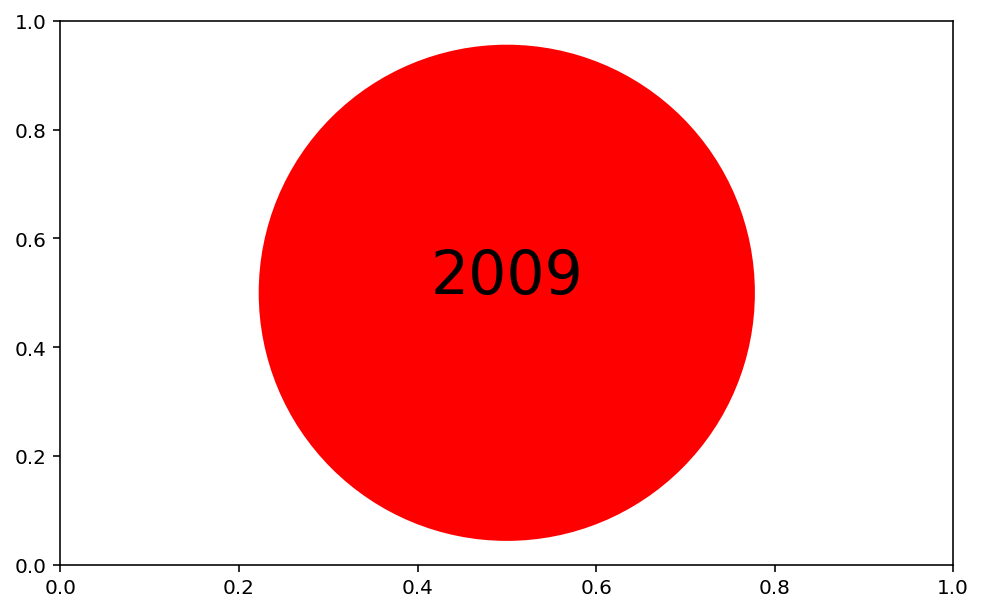

In [108]:
# White circle with label at center
fig, ax = plt.subplots()

ax = fig.add_subplot(111)

x = 0
y = 0

circle = plt.Circle((x, y), radius=1,color='red')

ax.add_patch(circle)

label = ax.annotate("2009", xy=(x, y), fontsize=30, ha="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show()

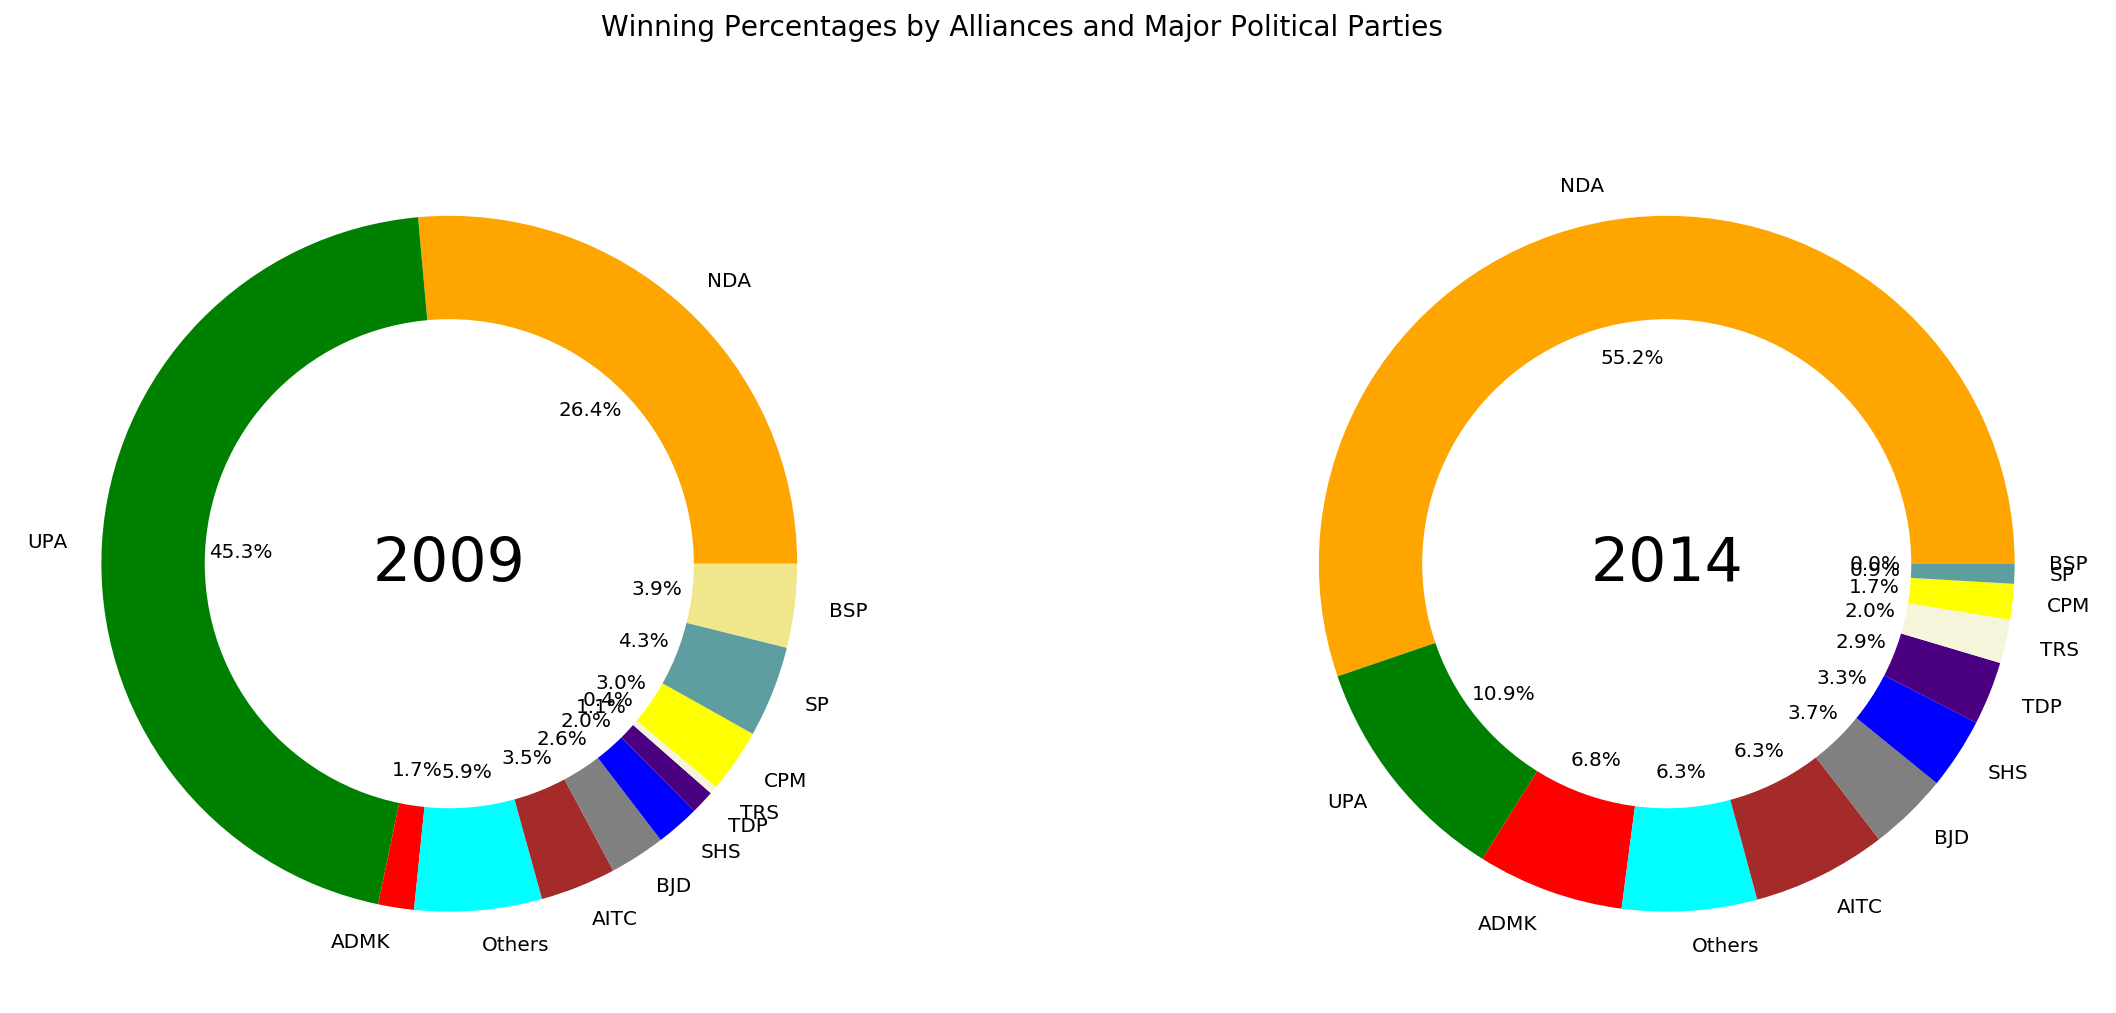

In [109]:

# Seats won by Alliances and Major Political Parties

colors  = ("orange", "green", "red", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow","cadetblue","khaki")
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.pie(SeatsWin[2009], labels=SeatsWin['Alliance'], colors=colors,autopct='%1.1f%%')
my_circle1=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
fig.suptitle("Winning Percentages by Alliances and Major Political Parties", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle1)

label = ax.annotate("2009", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()



#plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.pie(SeatsWin[2014], labels=SeatsWin['Alliance'], colors=colors,autopct='%1.1f%%')
my_circle2=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle2)

label = ax.annotate("2014", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show();



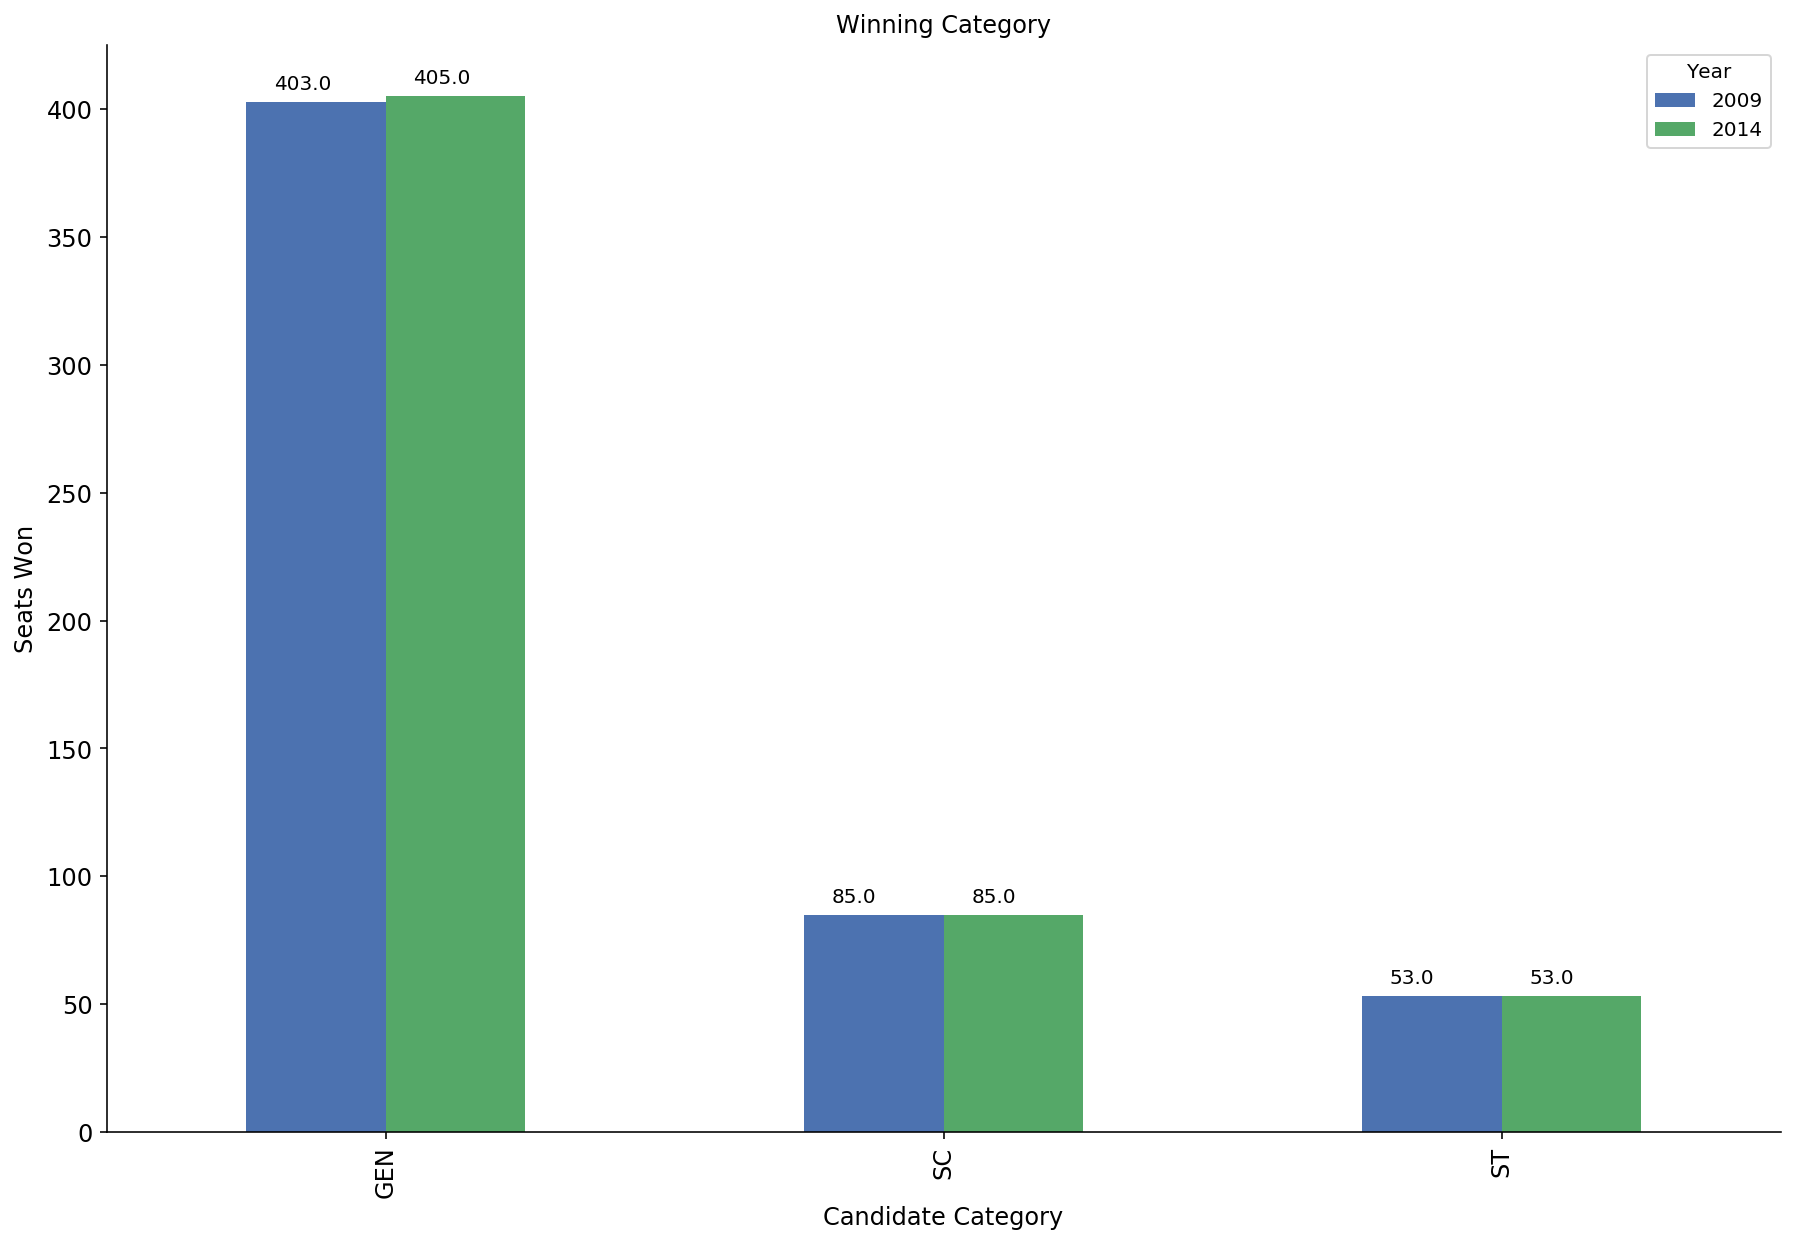

In [110]:
## function to add value label to plot
def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
        
        
CatWin = LS0914Cand[(LS0914Cand.Position==1)].groupby(['Candidate Category','Year'])['Position'].sum().reset_index().pivot(index='Candidate Category', columns='Year',values='Position').reset_index().fillna(0).sort_values([2014,2009], ascending=False).reset_index(drop = True)
#print(CatWin['Candidate Category'].unique())
#CatWin


nx = CatWin.plot(kind='bar', title ="Winning Category", figsize=(15, 10), legend=True, fontsize=12)
nx.set_xlabel("Candidate Category", fontsize=12)
nx.set_ylabel("Seats Won", fontsize=12)

# Modifying Axis Labels
labels = [item.get_text() for item in nx.get_xticklabels()]
labels[0] = 'GEN'
labels[1]= 'SC'
labels[2]='ST'
nx.set_xticklabels(labels)

annot_plot(nx,0.05,5)
    


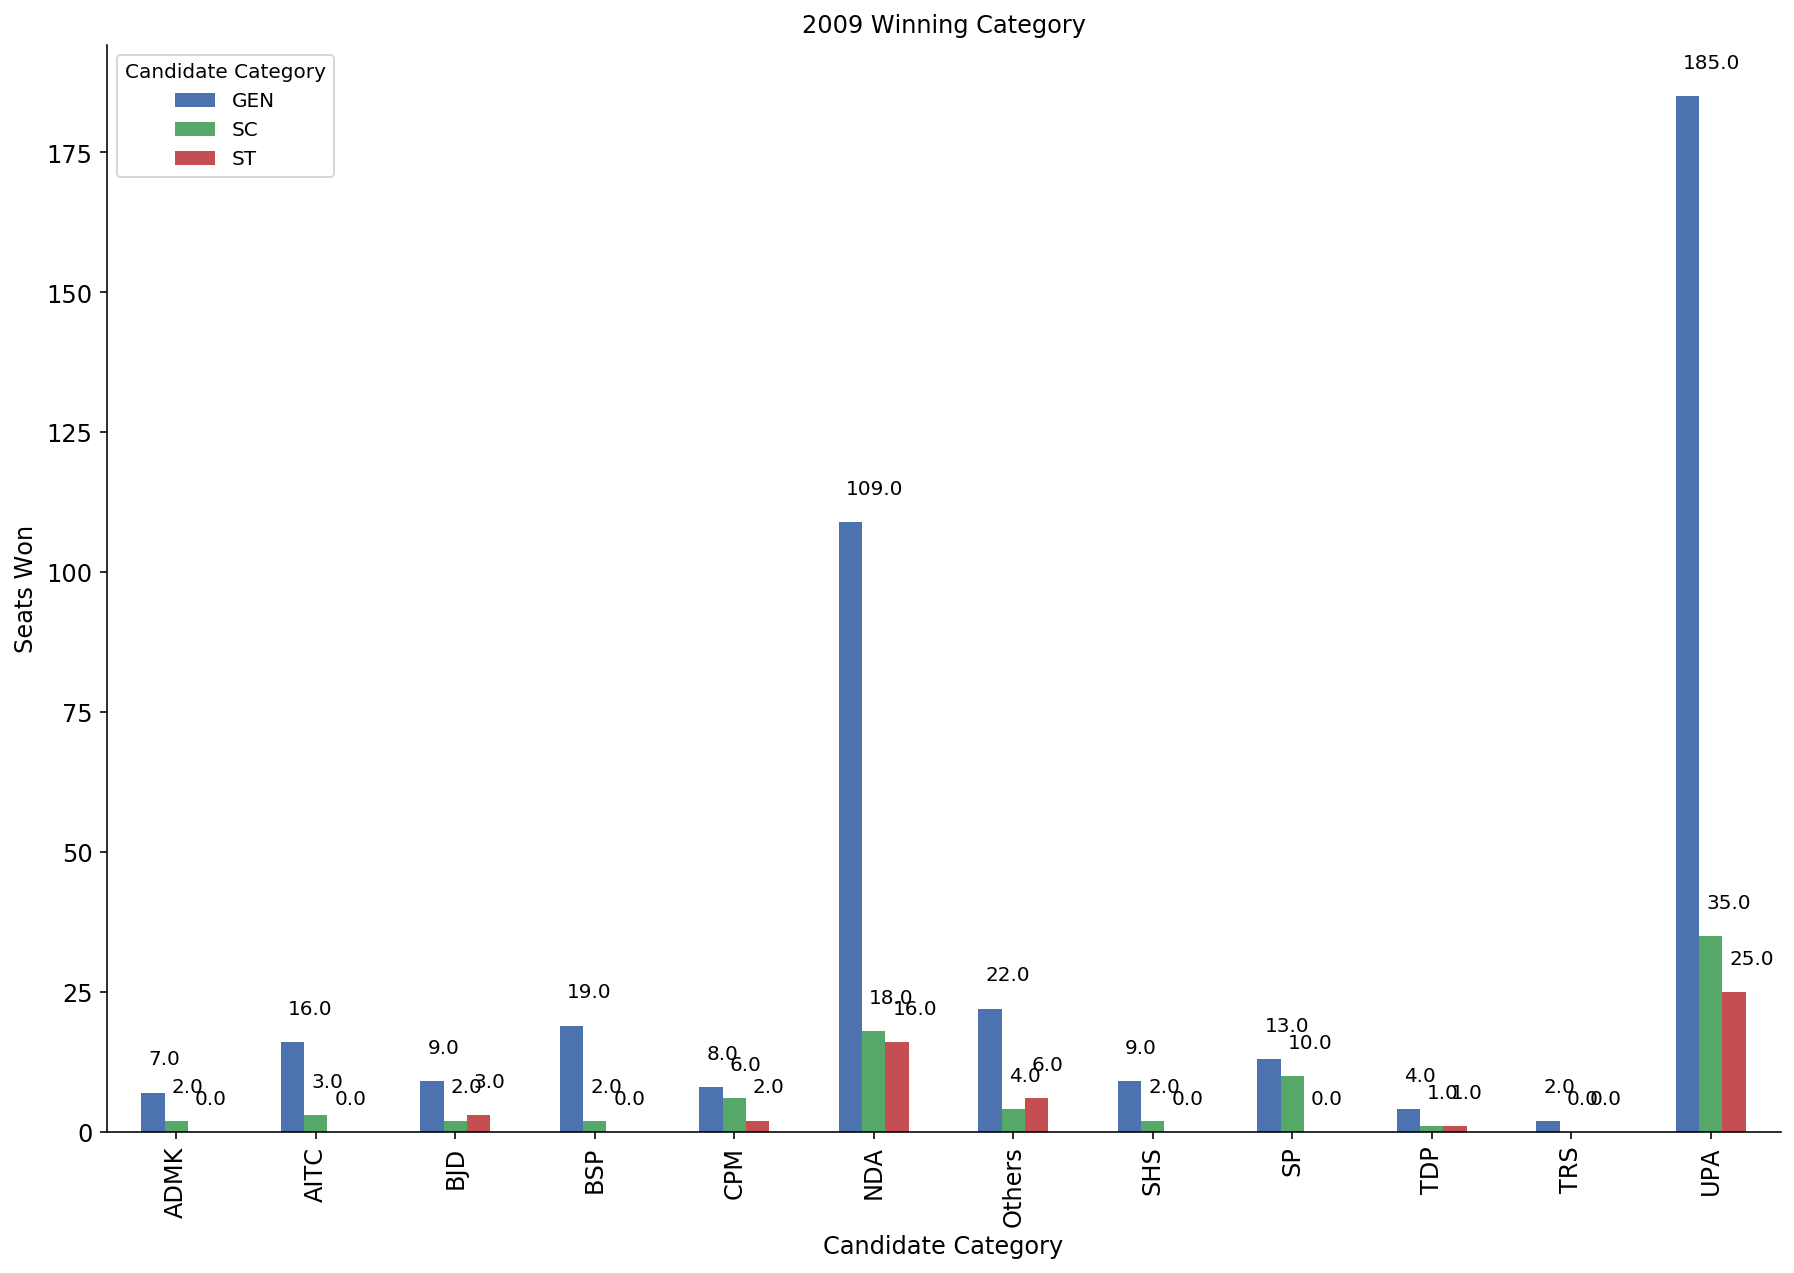

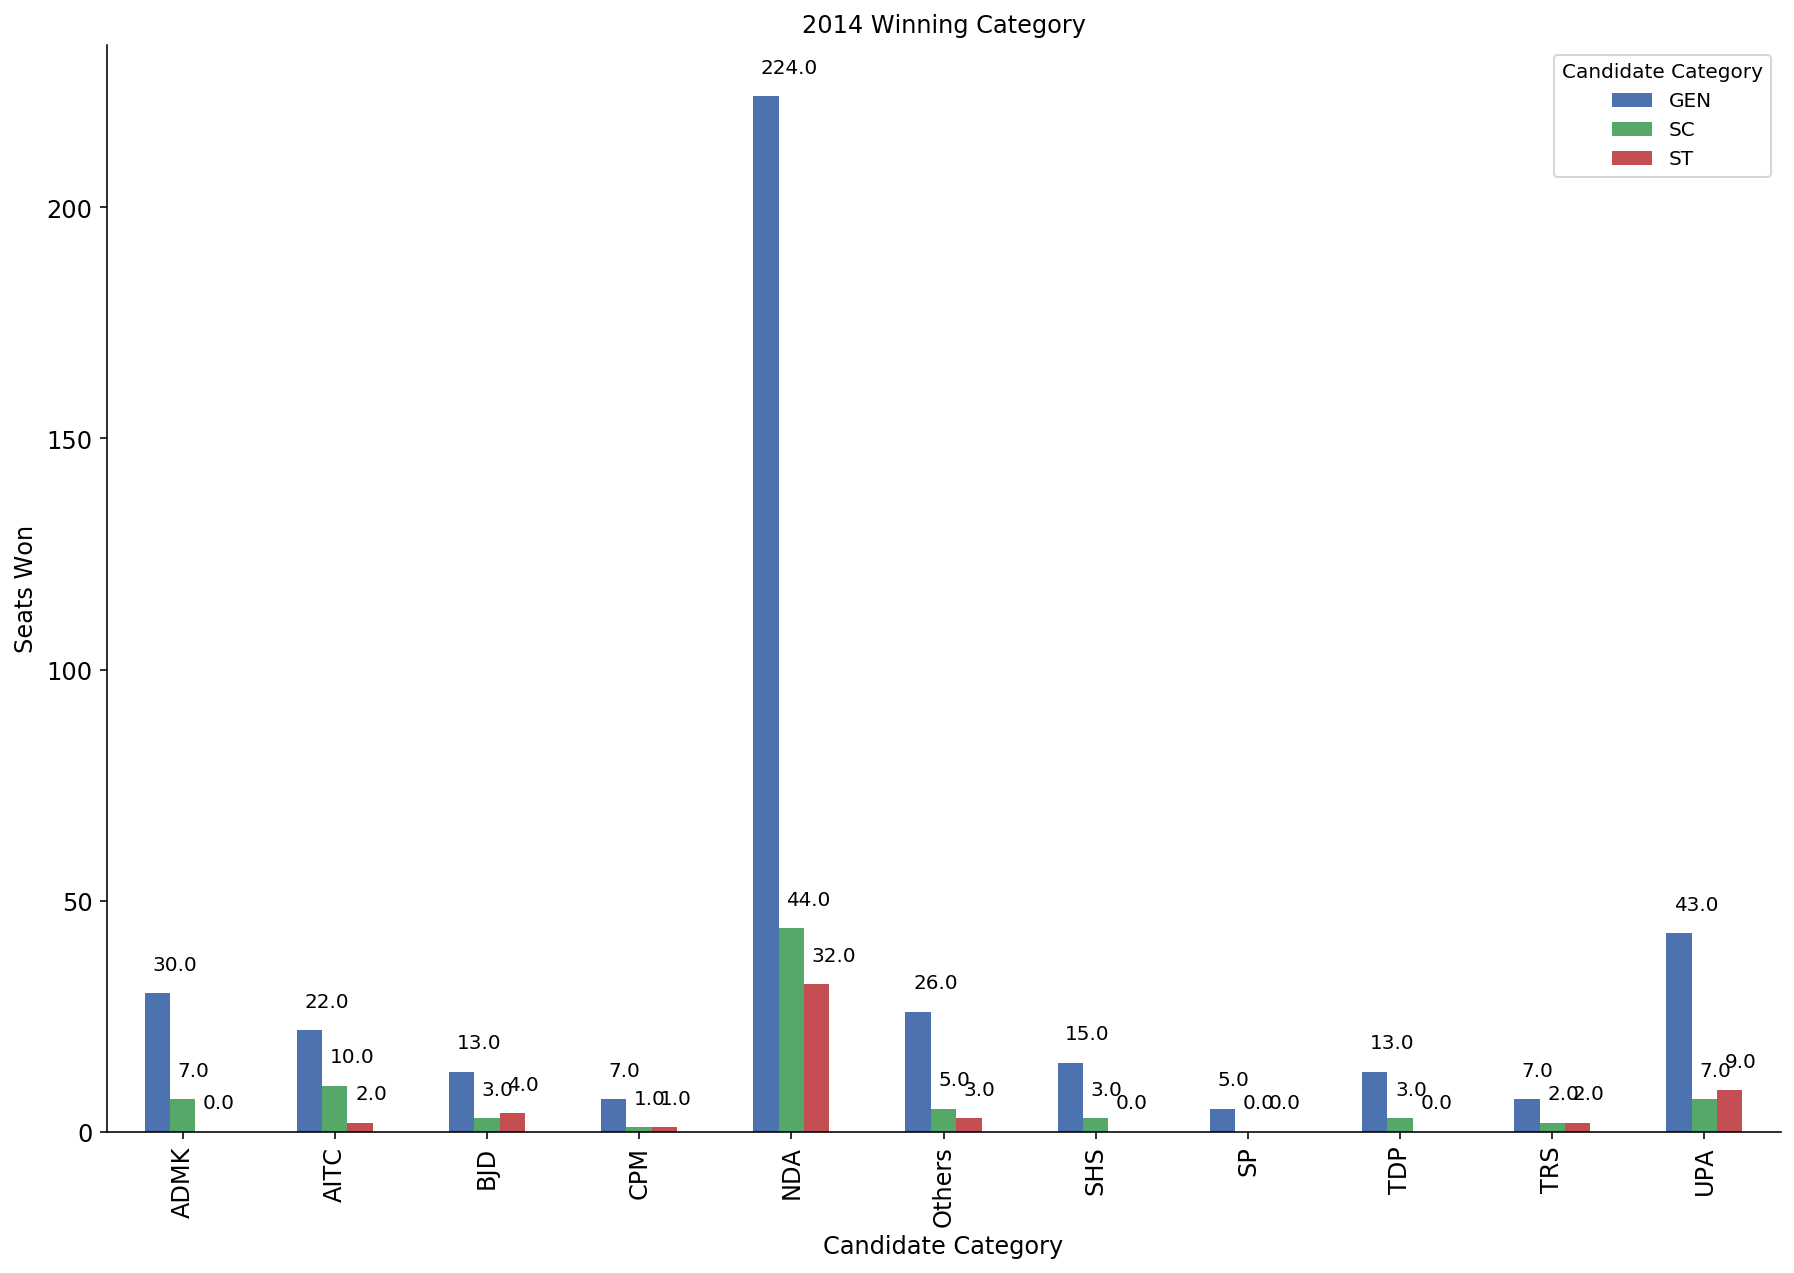

In [111]:
CatAlliance09 = LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)].groupby(['Alliance','Candidate Category'])['Position'].sum().unstack().reset_index().fillna(0)
CatAlliance14 = LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)].groupby(['Alliance','Candidate Category'])['Position'].sum().unstack().reset_index().fillna(0)

nx = CatAlliance09.plot(kind='bar', title ="2009 Winning Category", figsize=(15, 10), legend=True, fontsize=12)
nx.set_xlabel("Candidate Category", fontsize=12)
nx.set_ylabel("Seats Won", fontsize=12)

# Modifying Axis Labels
labels = [item.get_text() for item in nx.get_xticklabels()]
labels[0:11] = CatAlliance09['Alliance']
#labels[1]= 'SC'
#labels[2]='ST'
nx.set_xticklabels(labels)

annot_plot(nx,0.05,5)

nx = CatAlliance14.plot(kind='bar', title ="2014 Winning Category", figsize=(15, 10), legend=True, fontsize=12)
nx.set_xlabel("Candidate Category", fontsize=12)
nx.set_ylabel("Seats Won", fontsize=12)

# Modifying Axis Labels
labels = [item.get_text() for item in nx.get_xticklabels()]
labels[0:11] = CatAlliance14['Alliance']
#labels[1]= 'SC'
#labels[2]='ST'
nx.set_xticklabels(labels)

annot_plot(nx,0.05,5)

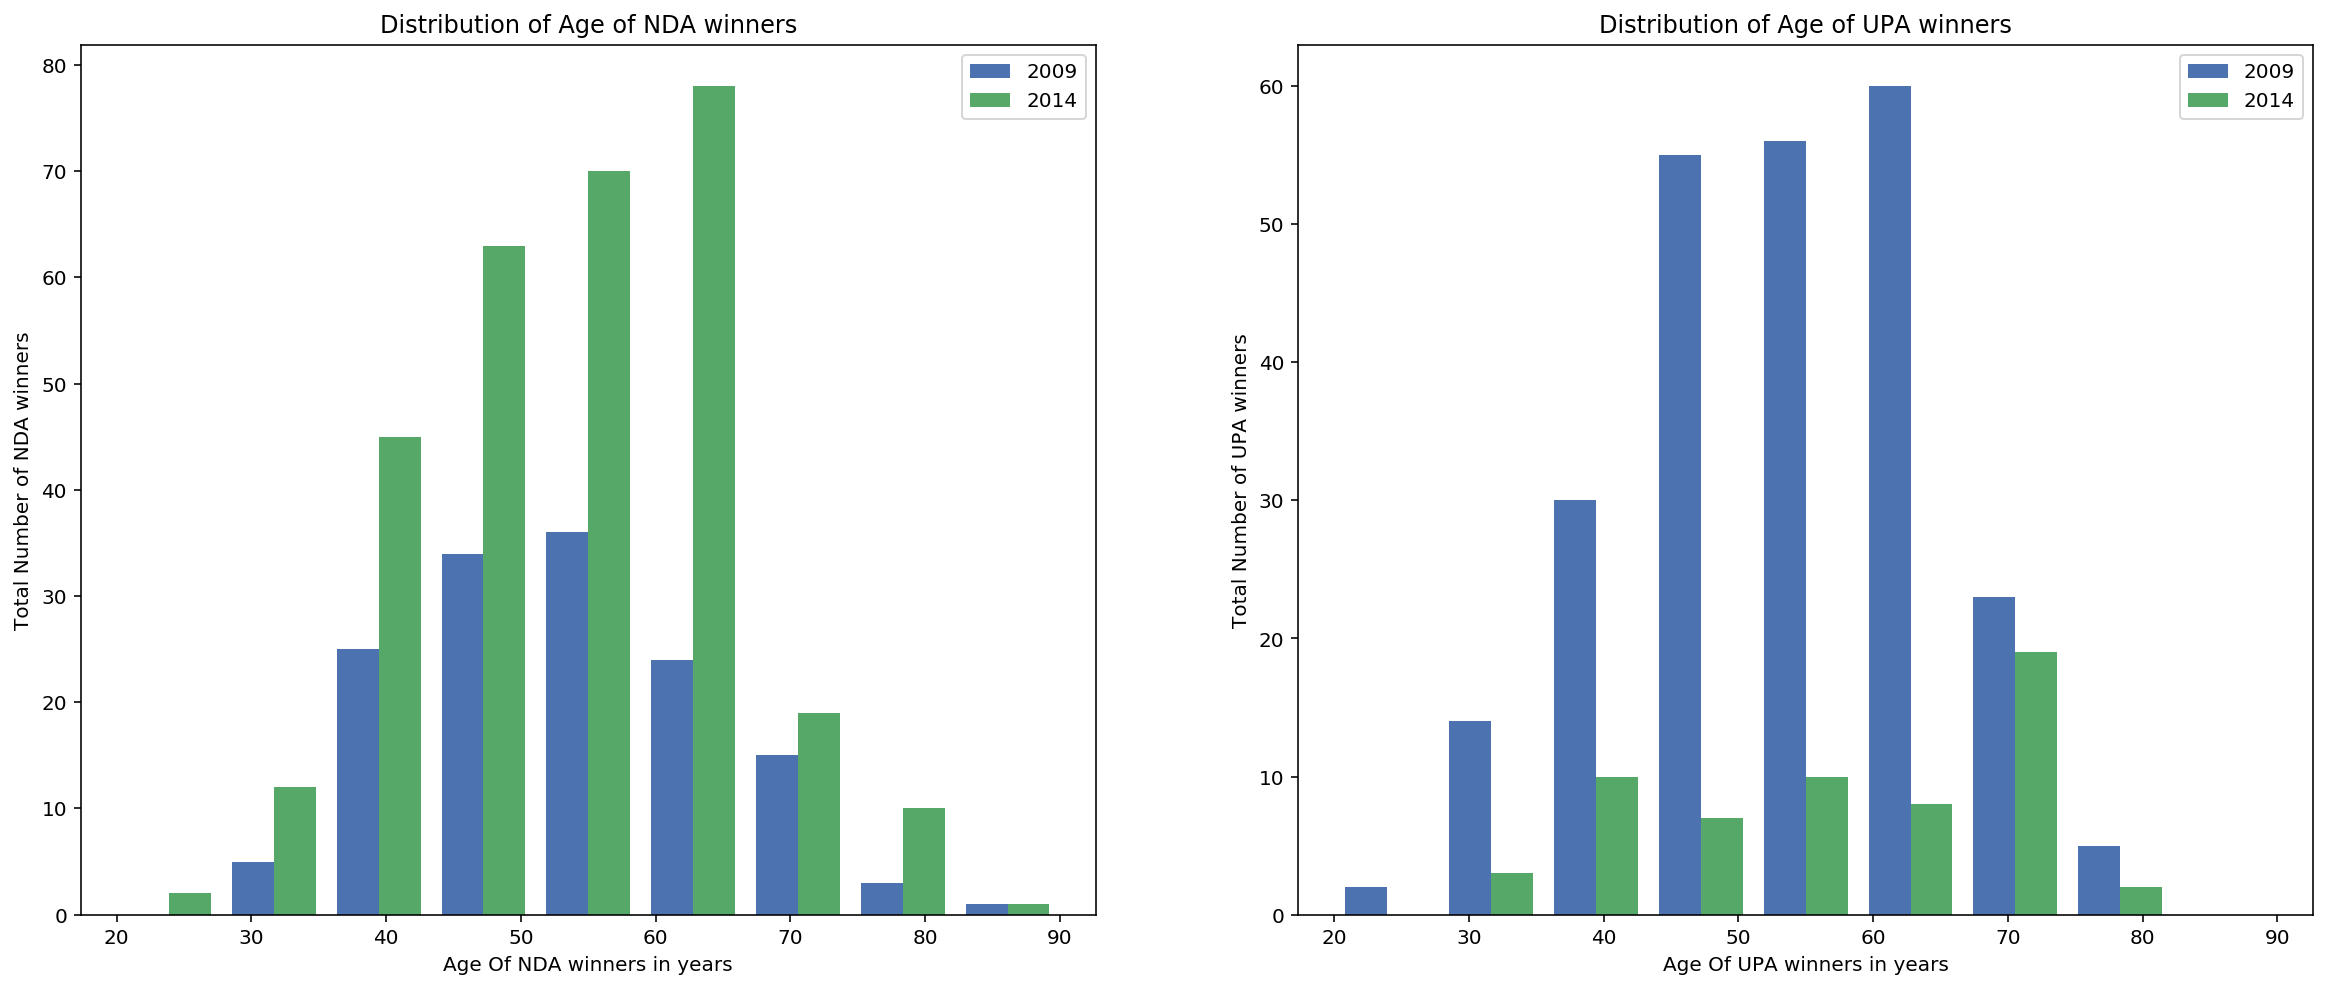

In [112]:
# Age Distribution of Winning Candidates in 2009 & 2014 for NDA & UPA in India Elections

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.style.use('seaborn-deep')

Age09UPA=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)& (LS0914Cand.Alliance=='UPA')]['Candidate Age'].tolist()
Age14UPA=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)& (LS0914Cand.Alliance=='UPA')]['Candidate Age'].tolist()
Age09NDA=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)& (LS0914Cand.Alliance=='NDA')]['Candidate Age'].tolist()
Age14NDA=LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)& (LS0914Cand.Alliance=='NDA')]['Candidate Age'].tolist()

bins = np.linspace(20, 90, 10)
plt.hist([Age09NDA, Age14NDA], bins, label=['2009', '2014'])
plt.legend(loc='upper right')
plt.xlabel('Age Of NDA winners in years')
plt.ylabel('Total Number of NDA winners')
plt.title('Distribution of Age of NDA winners')


plt.subplot(1,2,2)
bins = np.linspace(20, 90, 10)
plt.hist([Age09UPA, Age14UPA], bins, label=['2009', '2014'])
plt.legend(loc='upper right')
plt.xlabel('Age Of UPA winners in years')
plt.ylabel('Total Number of UPA winners')
plt.title('Distribution of Age of UPA winners')

plt.show();

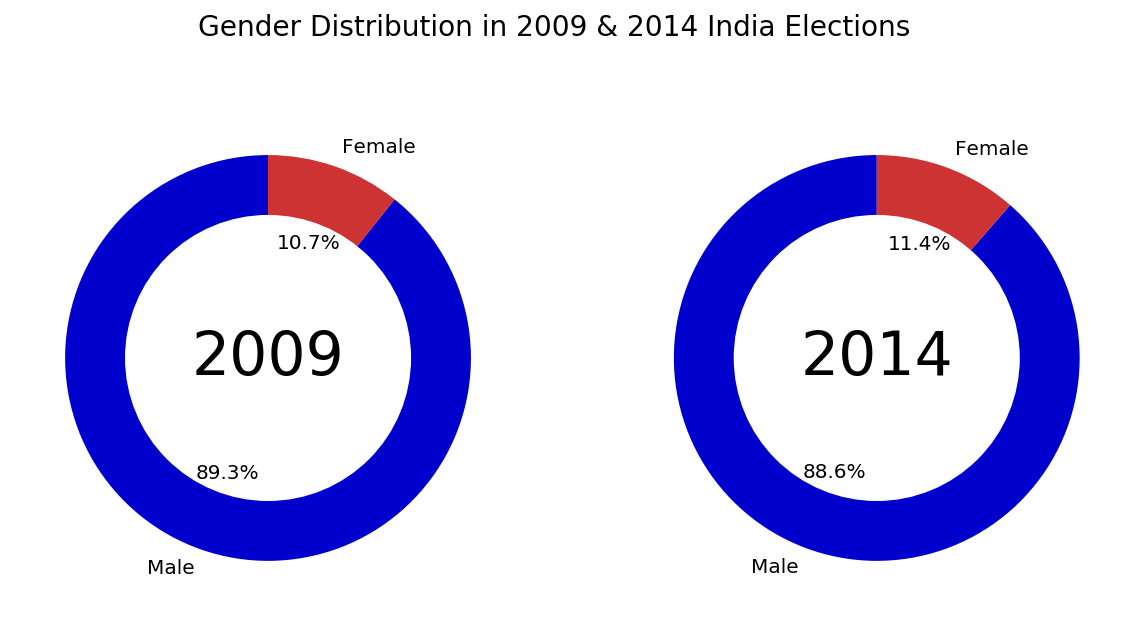

In [113]:
# Gender Distribution of Winning Candidates in 2009 & 2014 India Elections
colors = ['#0000CD','#CD3333']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle1=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() 
fig.suptitle("Gender Distribution in 2009 & 2014 India Elections", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() 
ax.add_patch(my_circle1)
label = ax.annotate("2009", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.subplot(1,2,2)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle2=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle2)

label = ax.annotate("2014", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show();

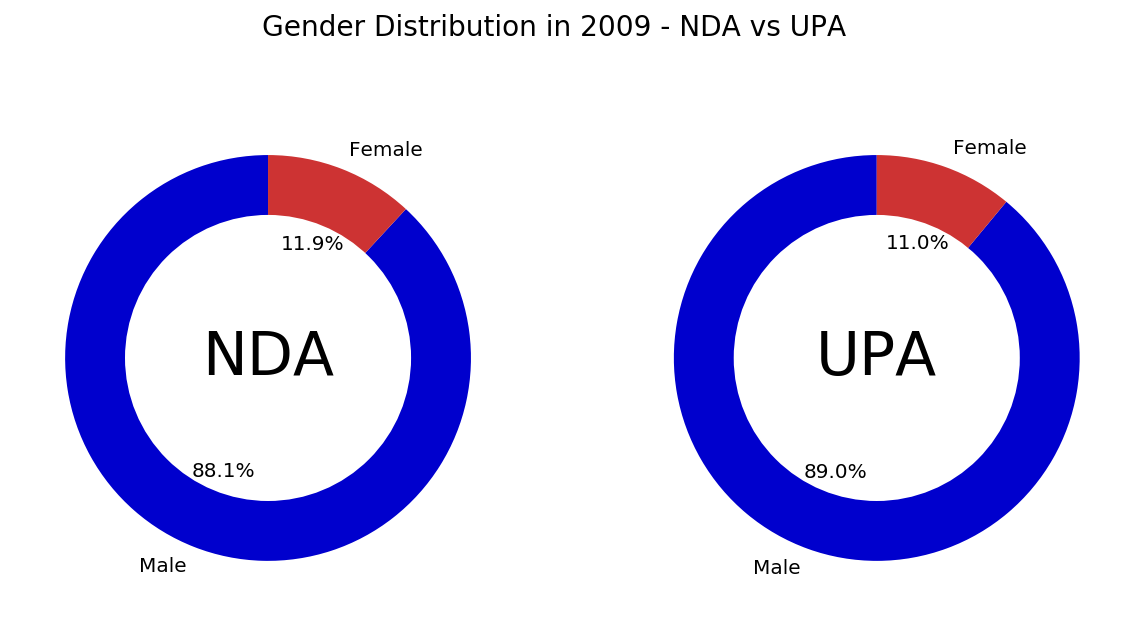

In [114]:
# Gender Distribution of Winning Candidates in 2009 - NDA vs UPA in India Elections
colors = ['#0000CD','#CD3333']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)& (LS0914Cand.Alliance=='NDA')]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle1=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() 
fig.suptitle("Gender Distribution in 2009 - NDA vs UPA", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() 
ax.add_patch(my_circle1)
label = ax.annotate("NDA", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.subplot(1,2,2)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)& (LS0914Cand.Alliance=='UPA')]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle2=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle2)

label = ax.annotate("UPA", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show();

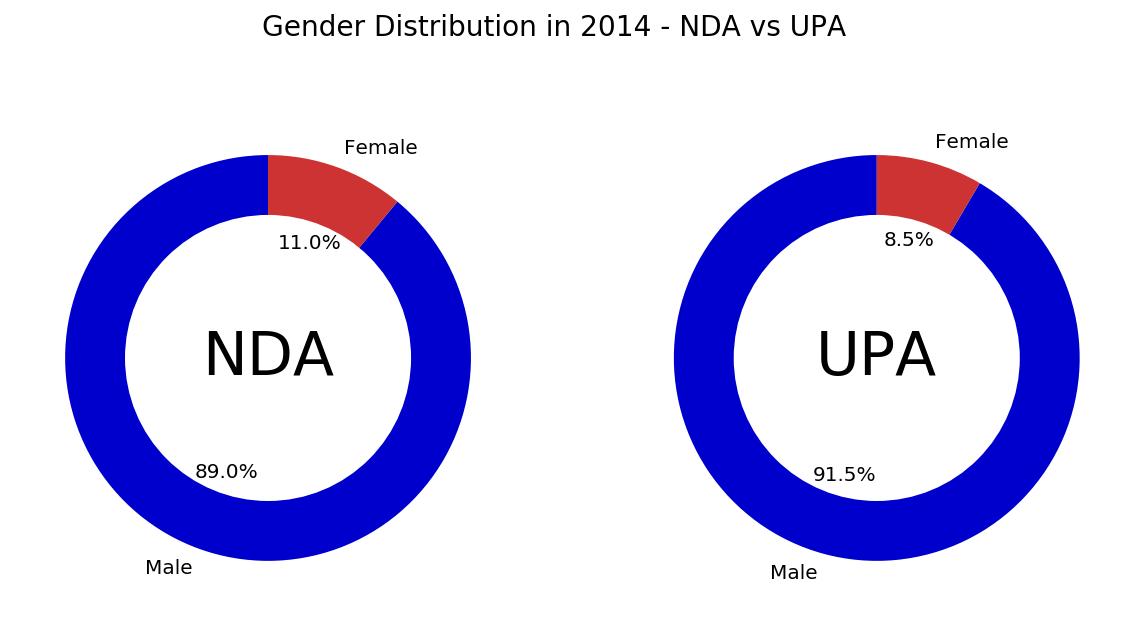

In [115]:
# Gender Distribution of Winning Candidates in 2014 - NDA vs UPA in India Elections

color = ['#0000CD','#CD3333']
plt.figure(figsize=(10,5))
plt.title('2014')
plt.subplot(1,2,1)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)& (LS0914Cand.Alliance=='NDA')]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle1=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() 
fig.suptitle("Gender Distribution in 2014 - NDA vs UPA", fontsize=14) # Adding supertitle with pyplot import
ax = fig.gca() 
ax.add_patch(my_circle1)
label = ax.annotate("NDA", xy=(0, 0), fontsize=30, ha="center",va="center")
ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.subplot(1,2,2)
plt.pie(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)& (LS0914Cand.Alliance=='UPA')]['Candidate Sex'].value_counts(), labels=['Male','Female'],autopct='%1.1f%%',colors=colors, startangle=90)
my_circle2=plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf() #gcf means get current figure
ax = fig.gca() # gca means get current axis
ax.add_patch(my_circle2)

label = ax.annotate("UPA", xy=(0, 0), fontsize=30, ha="center",va="center")

ax.axis('off')
ax.set_aspect('equal')
ax.autoscale_view()

plt.show();

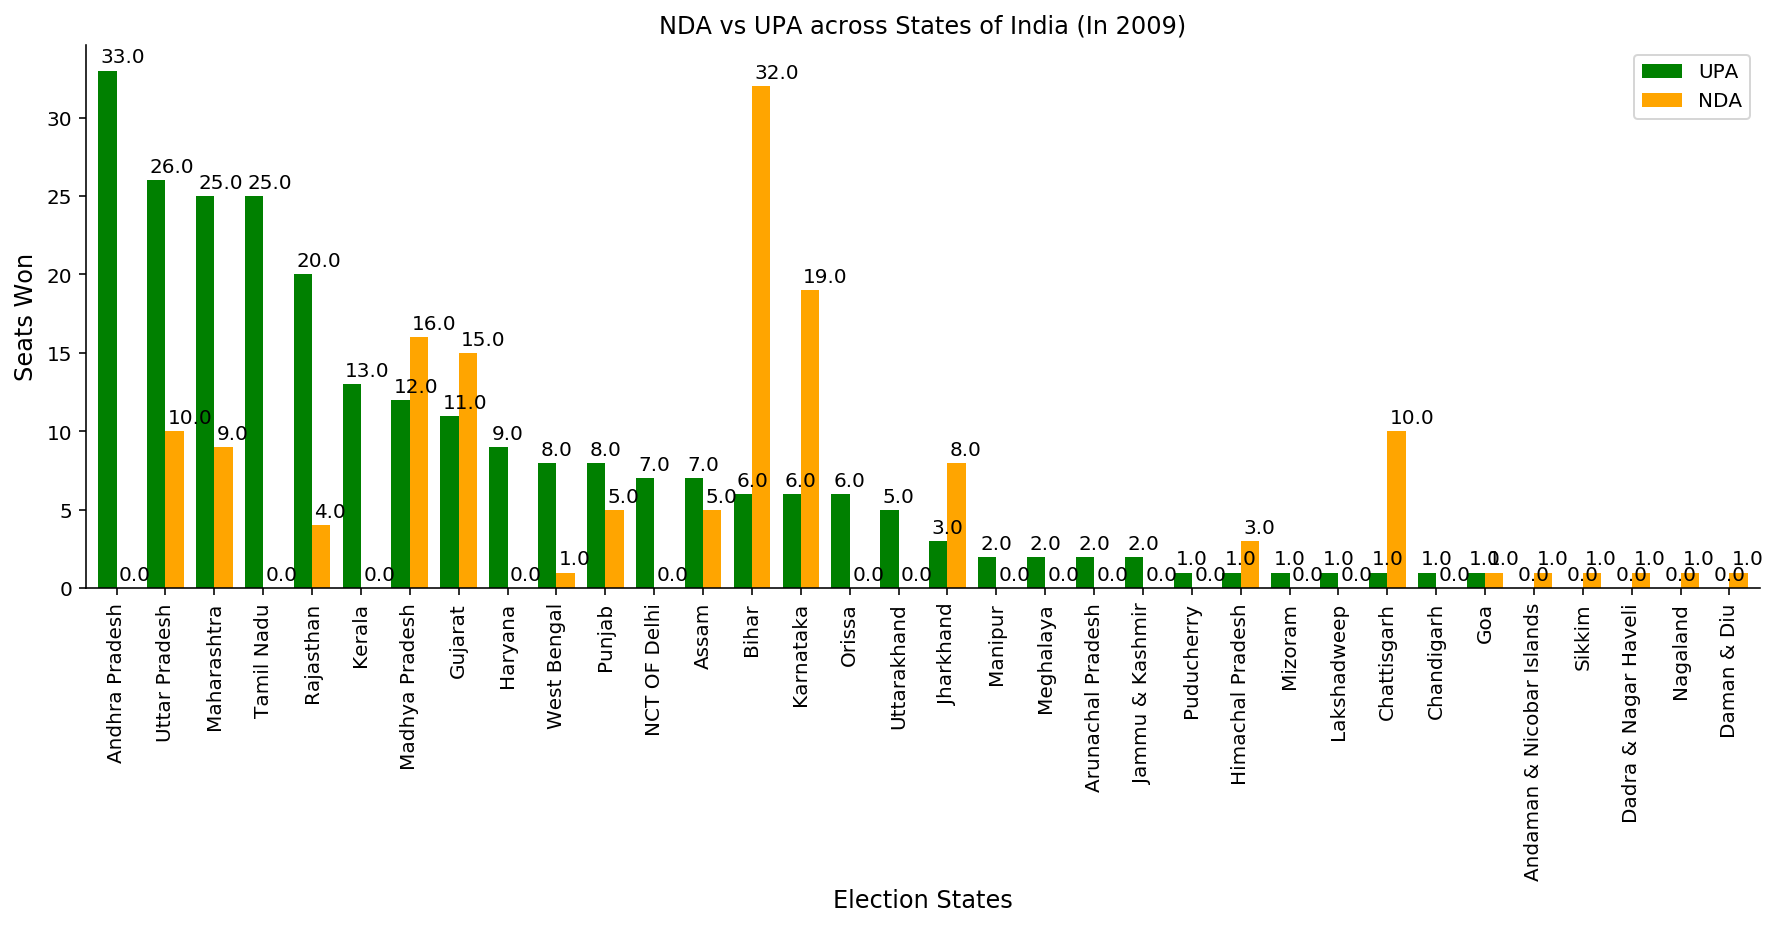

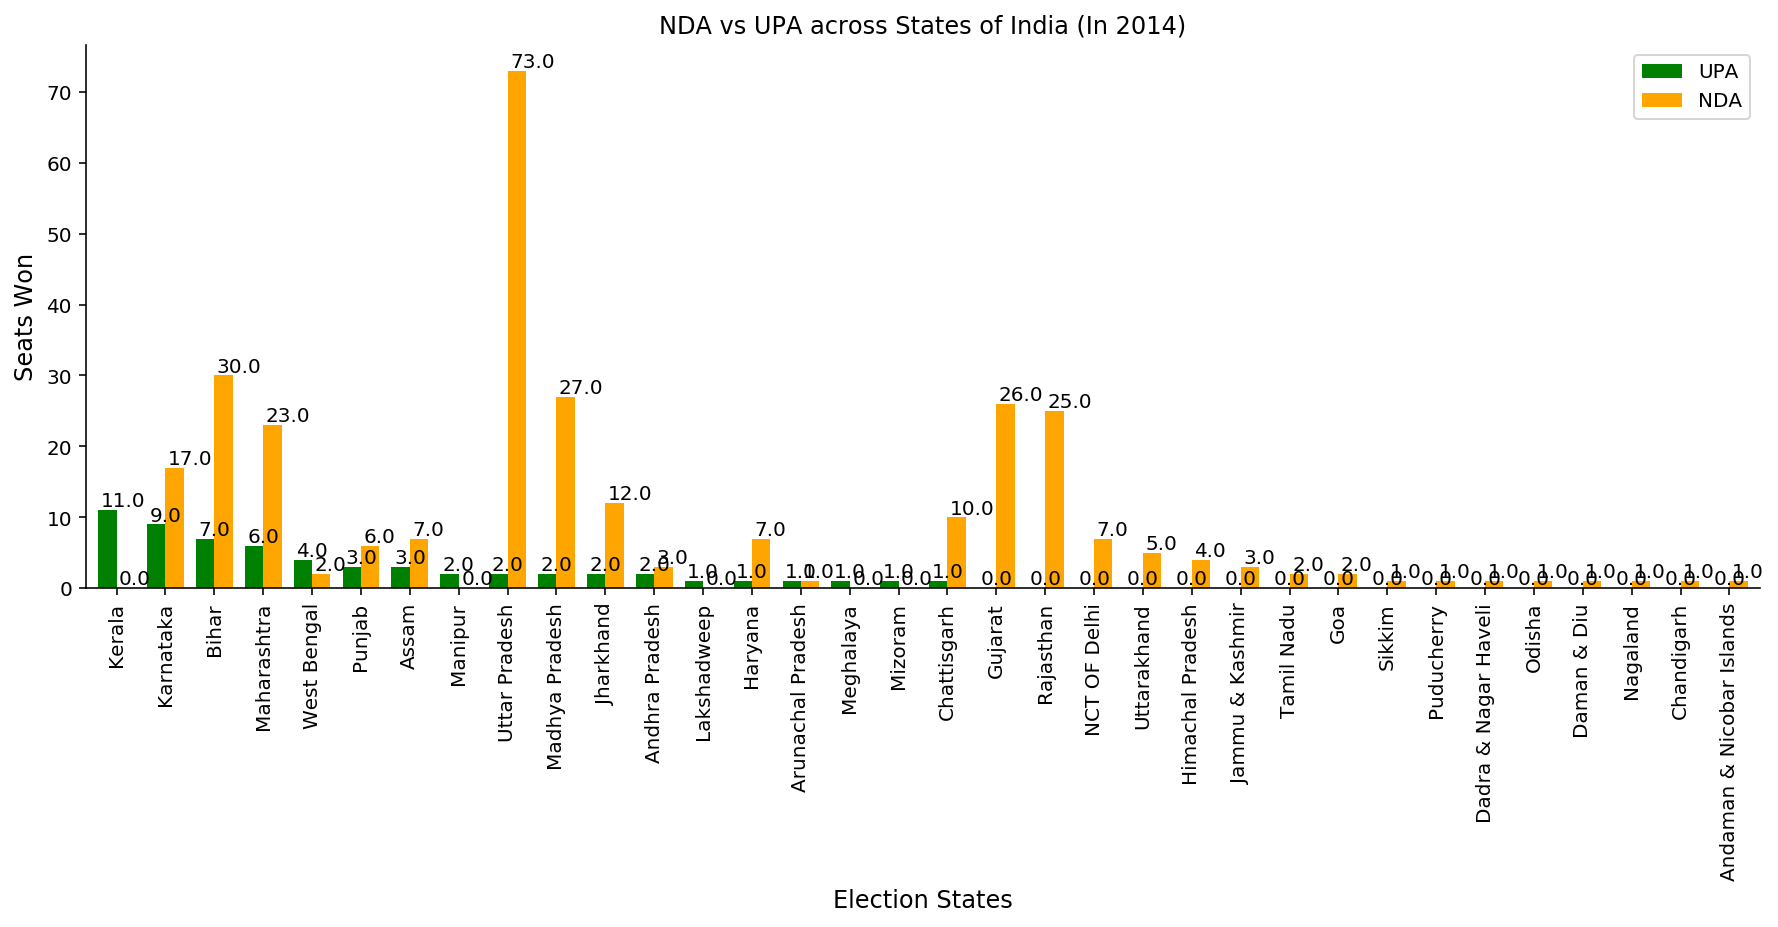

In [116]:
# Distribution of Winning Seats across states in 2009 & 2014 for NDA & UPA in India Elections

color  = ("green","orange")

State09UPA=pd.DataFrame(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)& (LS0914Cand.Alliance=='UPA')]['State name'].value_counts())
State14UPA=pd.DataFrame(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)& (LS0914Cand.Alliance=='UPA')]['State name'].value_counts())
State09NDA=pd.DataFrame(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2009)& (LS0914Cand.Alliance=='NDA')]['State name'].value_counts())
State14NDA=pd.DataFrame(LS0914Cand[(LS0914Cand.Position==1) & (LS0914Cand.Year==2014)& (LS0914Cand.Alliance=='NDA')]['State name'].value_counts())


State09 = pd.concat([State09UPA, State09NDA], axis=1, sort=False).fillna(0)
State09.columns = ['UPA','NDA']

State14 = pd.concat([State14UPA, State14NDA], axis=1, sort=False).fillna(0)
State14.columns = ['UPA','NDA']


nx = State09.plot(kind='bar',    # Plot a bar chart
            legend=True,    # Turn the Legend off
            title = "NDA vs UPA across States of India (In 2009)",      
            width=0.75,      # Set bar width as 75% of space available
            figsize=(15,5),  # Set area size (width,height) of plot in inches
            color= color)
nx.set_xlabel("Election States", fontsize=12)
nx.set_ylabel("Seats Won", fontsize=12)
annot_plot(nx,0.05,0.5);

kx = State14.plot(kind='bar',    # Plot a bar chart
            legend=True,    # Turn the Legend off
            title = "NDA vs UPA across States of India (In 2014)",      
            width=0.75,      # Set bar width as 75% of space available
            figsize=(15,5),  # Set area size (width,height) of plot in inches
            color= color)
kx.set_xlabel("Election States", fontsize=12)
kx.set_ylabel("Seats Won", fontsize=12)
annot_plot(kx,0.05,0.5);



In [117]:
LS09Elec = pd.read_csv('C:\\Users\\anand\\Desktop\\data sets\\datasets_2965_4980_LS2009Electors.csv')
print(LS09Elec.shape)
LS09Elec.head()



(543, 8)


STATE CODE           STATE  PC NO PARLIAMENTARY CONSTITUENCY  Total voters  \
0        S01  Andhra Pradesh      1                   Adilabad        864165   
1        S01  Andhra Pradesh      2                 Peddapalle        905332   
2        S01  Andhra Pradesh      3                 Karimnagar        990646   
3        S01  Andhra Pradesh      4                  Nizamabad        891508   
4        S01  Andhra Pradesh      5                  Zahirabad       1017372   

   Total_Electors  TOT_CONTESTANT  POLL PERCENTAGE  
0         1131211               9            76.39  
1         1315642              15            68.81  
2         1496211              15            66.21  
3         1333271              12            66.87  
4         1359566              10            74.83

In [118]:
LS14Elec = pd.read_csv('C:\\Users\\anand\\Desktop\\data sets\\datasets_2965_4980_LS2014Electors.csv')
print(LS09Elec.shape)
LS14Elec.head()

(543, 8)


STATE CODE           STATE  PC NO PARLIAMENTARY CONSTITUENCY  Total voters  \
0        S01  Andhra Pradesh      1                  Adilabad        1055593   
1        S01  Andhra Pradesh      2                Peddapalle        1025194   
2        S01  Andhra Pradesh      3                Karimnagar        1127225   
3        S01  Andhra Pradesh      4                  Nizamabad       1034032   
4        S01  Andhra Pradesh      5                  Zahirabad       1099784   

   Total_Electors  POLL PERCENTAGE  
0         1386282            76.15  
1         1425355            71.93  
2         1550810            72.69  
3         1496193            69.11  
4         1445354            76.09

In [119]:
LS09Elec.STATE.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [120]:
LS14Elec.STATE.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chhattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [121]:
LS14Elec['STATE']=LS14Elec['STATE'].replace(to_replace=['Odisha'],value='Orissa')
LS14Elec['STATE']=LS14Elec['STATE'].replace(to_replace=['Chhattisgarh'],value='Chattisgarh')

In [122]:
df_electrol_data14 =pd.read_csv('C:\\Users\\anand\\Desktop\\data sets\\datasets_2965_4980_LS2014Electors.csv')
df_electrol_data09 =pd.read_csv('C:\\Users\\anand\\Desktop\\data sets\\datasets_2965_4980_LS2009Electors.csv')
df_candidate_data14 = pd.read_csv('C:\\Users\\anand\\Desktop\\data sets\\datasets_2965_4980_LS2014Candidate.csv')
df_candidate_data09 = pd.read_csv('C:\\Users\\anand\\Desktop\\data sets\\datasets_2965_4980_LS2009Candidate.csv')

In [123]:
total_electors09=df_electrol_data09["Total_Electors"].sum()
print ("There are a total of ",+total_electors09 ,"electors in India")

There are a total of  716985101 electors in India


In [124]:
candidate_sex = df_candidate_data09["Candidate Sex"].value_counts()
candidate_sex

M    7475
F     552
Name: Candidate Sex, dtype: int64

In [125]:
total_electors=df_electrol_data14["Total_Electors"].sum()
print ("There are a total of ",+total_electors ,"electors in India")

There are a total of  834082814 electors in India


In [126]:
total_voters09=df_electrol_data09["Total voters"].sum()
print("There are a total of ",+total_voters09 ,"voters in India")

There are a total of  417351649 voters in India


In [127]:
total_voters=df_electrol_data14["Total voters"].sum()
print("There are a total of ",+total_voters ,"voters in India")

There are a total of  554175255 voters in India


INC      23
BJP      13
BSP       4
AITC      4
SP        3
JD(U)     2
SAD       2
NCP       2
SHS       1
DMK       1
CPM       1
RLD       1
TRS       1
Name: Party Abbreviation, dtype: int64

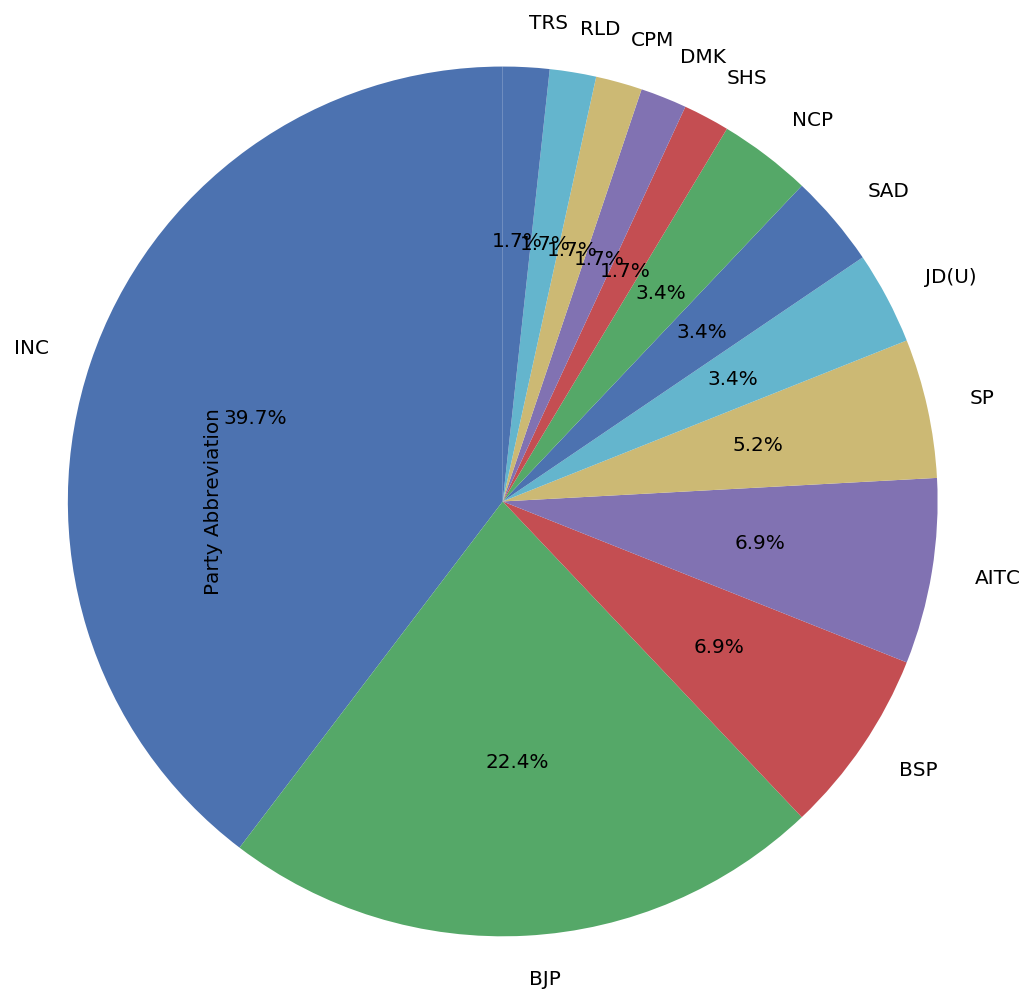

In [128]:
df_womenwinners09 = df_candidate_data09[(df_candidate_data09['Position']==1)&(df_candidate_data09["Candidate Sex"]=="F")]
 
ax = df_womenwinners09["Party Abbreviation"].value_counts().plot(kind="pie",radius=2,autopct='%1.1f%%', startangle=90)
x = df_womenwinners09["Party Abbreviation"].value_counts()
x

BJP      30
AITC     11
INC       4
ADMK      4
BJD       2
YSRCP     2
SHS       1
AD        1
CPM       1
LJP       1
JKPDP     1
SAD       1
SP        1
NCP       1
TRS       1
Name: Party Abbreviation, dtype: int64

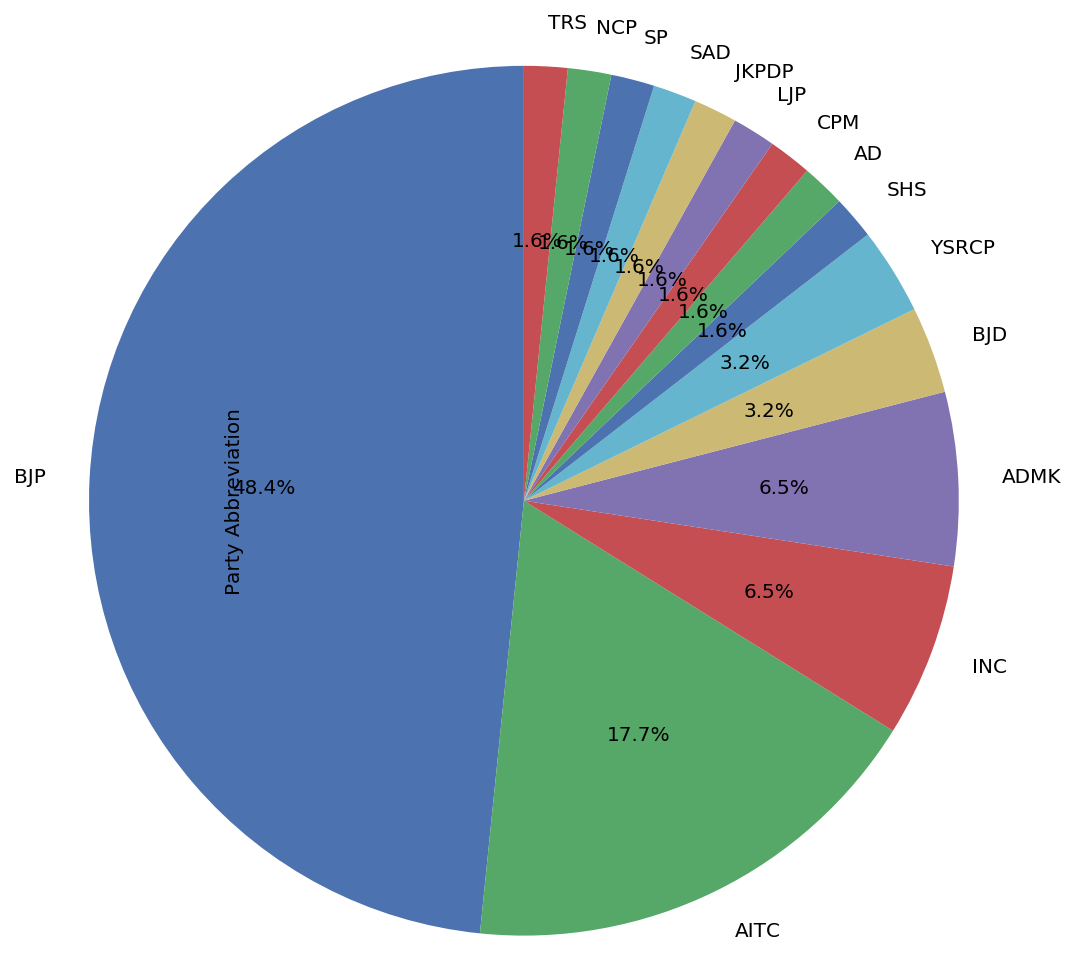

In [129]:
df_womenwinners14 = df_candidate_data14[(df_candidate_data14['Position']==1)&(df_candidate_data14["Candidate Sex"]=="F")]
ax1 = df_womenwinners14["Party Abbreviation"].value_counts().plot(kind="pie",radius=2,autopct='%1.1f%%', startangle=90)
x = df_womenwinners14["Party Abbreviation"].value_counts()
x

Party Abbreviation
INC     119111019.0
BJP      78175832.0
BSP      25718188.0
CPM      22219111.0
IND      21577849.0
SP       14283708.0
AITC     13356510.0
TDP      10481659.0
NCP       8521502.0
DMK       7226655.0
Name: Total Votes Polled, dtype: float64

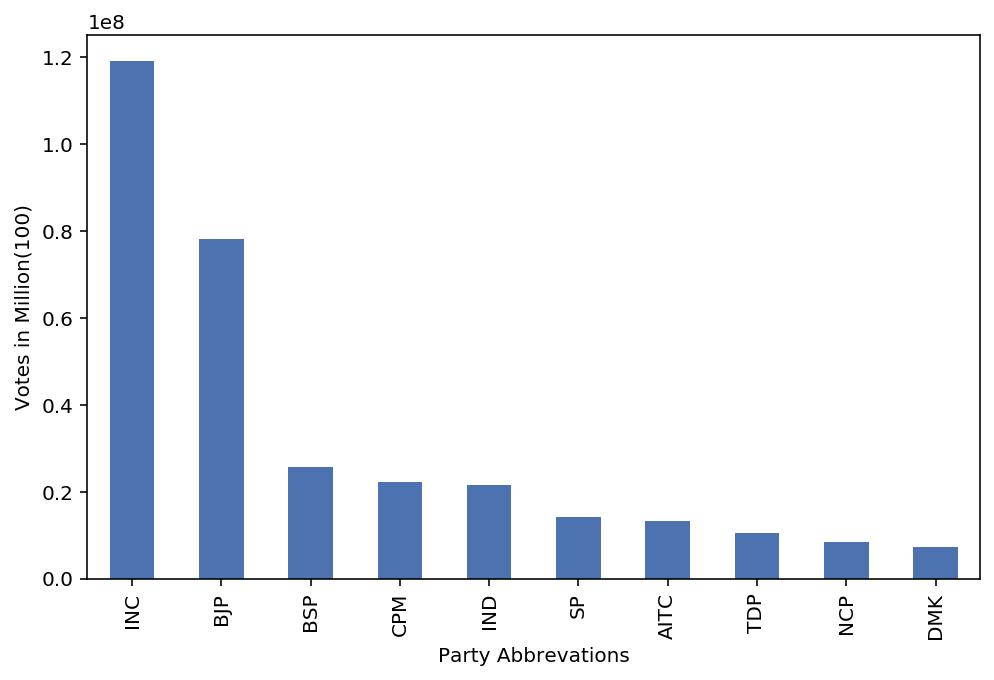

In [130]:
votespartywise09 = df_candidate_data09.groupby('Party Abbreviation')['Total Votes Polled'].sum()
x09 = votespartywise09.sort_values(ascending=False)[:10].plot(kind="bar")
x09.set_xlabel('Party Abbrevations')
x09.set_ylabel('Votes in Million(100)')
votespartywise09.sort_values(ascending=False)[:10]

Party Abbreviation
BJP      171660230
INC      106935942
BSP       22946346
AITC      21262665
SP        18673089
ADMK      18111579
CPM       17988955
IND       16737720
TDP       14099230
YSRCP     13995435
Name: Total Votes Polled, dtype: int64

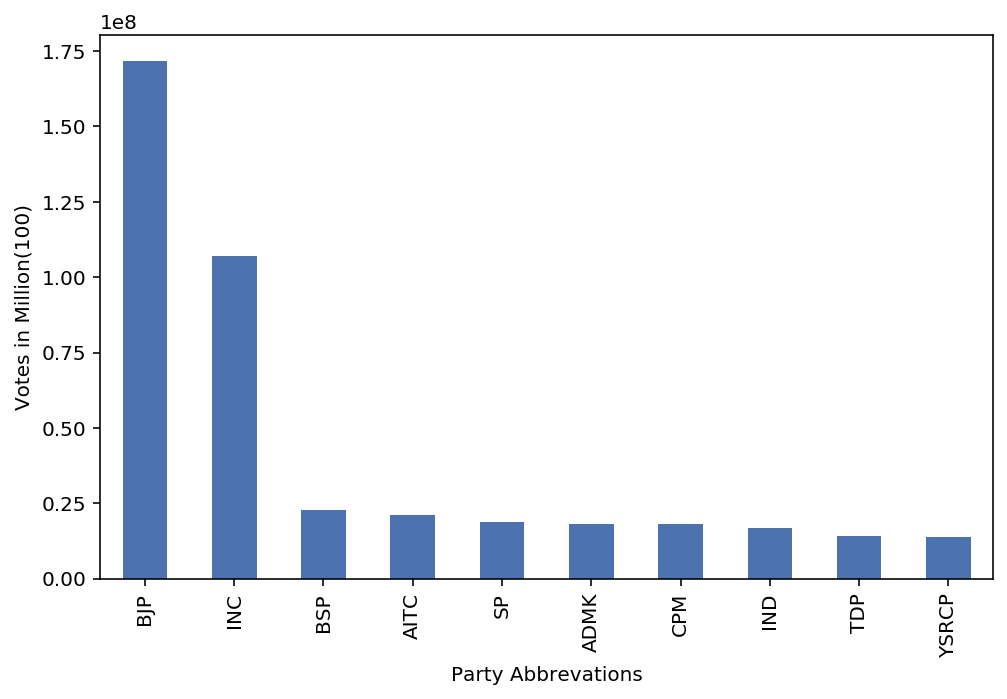

In [131]:
votespartywise14 = df_candidate_data14.groupby('Party Abbreviation')['Total Votes Polled'].sum()
x14 = votespartywise14.sort_values(ascending=False)[:10].plot(kind="bar")
x14.set_xlabel('Party Abbrevations')
x14.set_ylabel('Votes in Million(100)')
votespartywise14.sort_values(ascending=False)[:10]

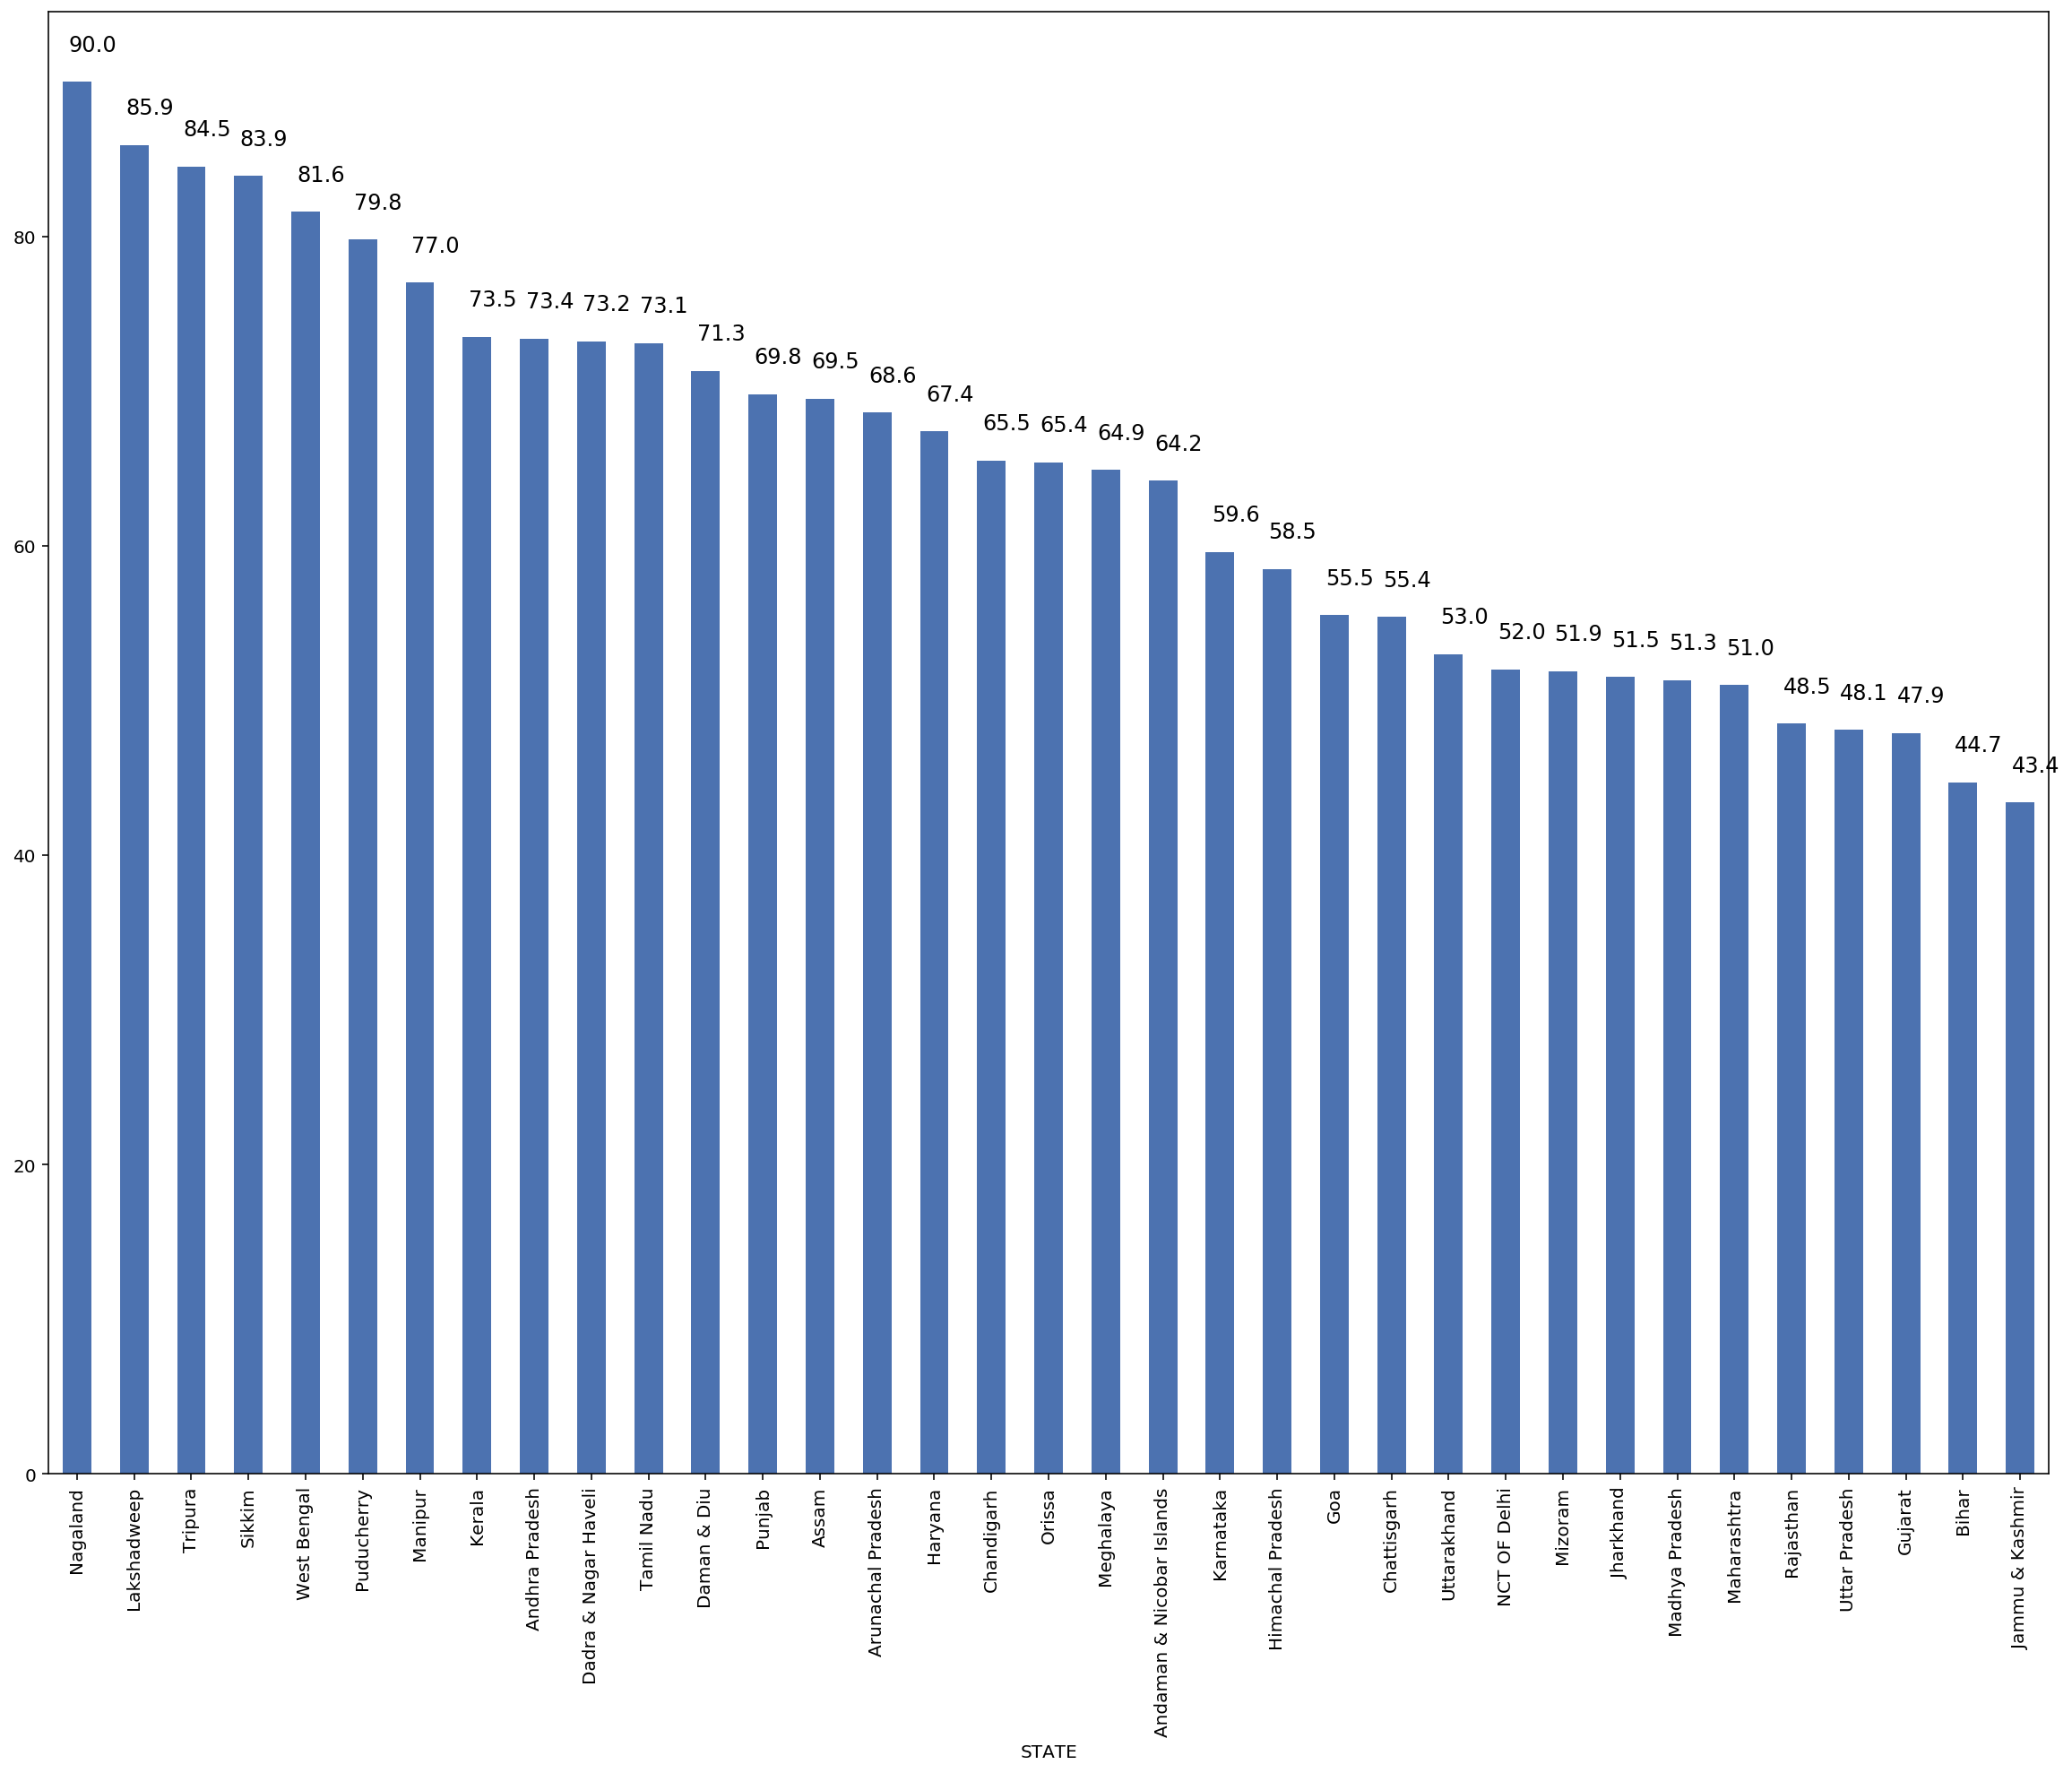

In [132]:
pollper = df_electrol_data09.groupby("STATE").mean()
LS09 = pollper[['POLL PERCENTAGE']].round(1).sort_values('POLL PERCENTAGE',ascending=False)
ax1 =LS09['POLL PERCENTAGE'].plot(kind='bar',figsize=(20, 15))
for p in ax1.patches:
    ax1.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2),fontsize=12)


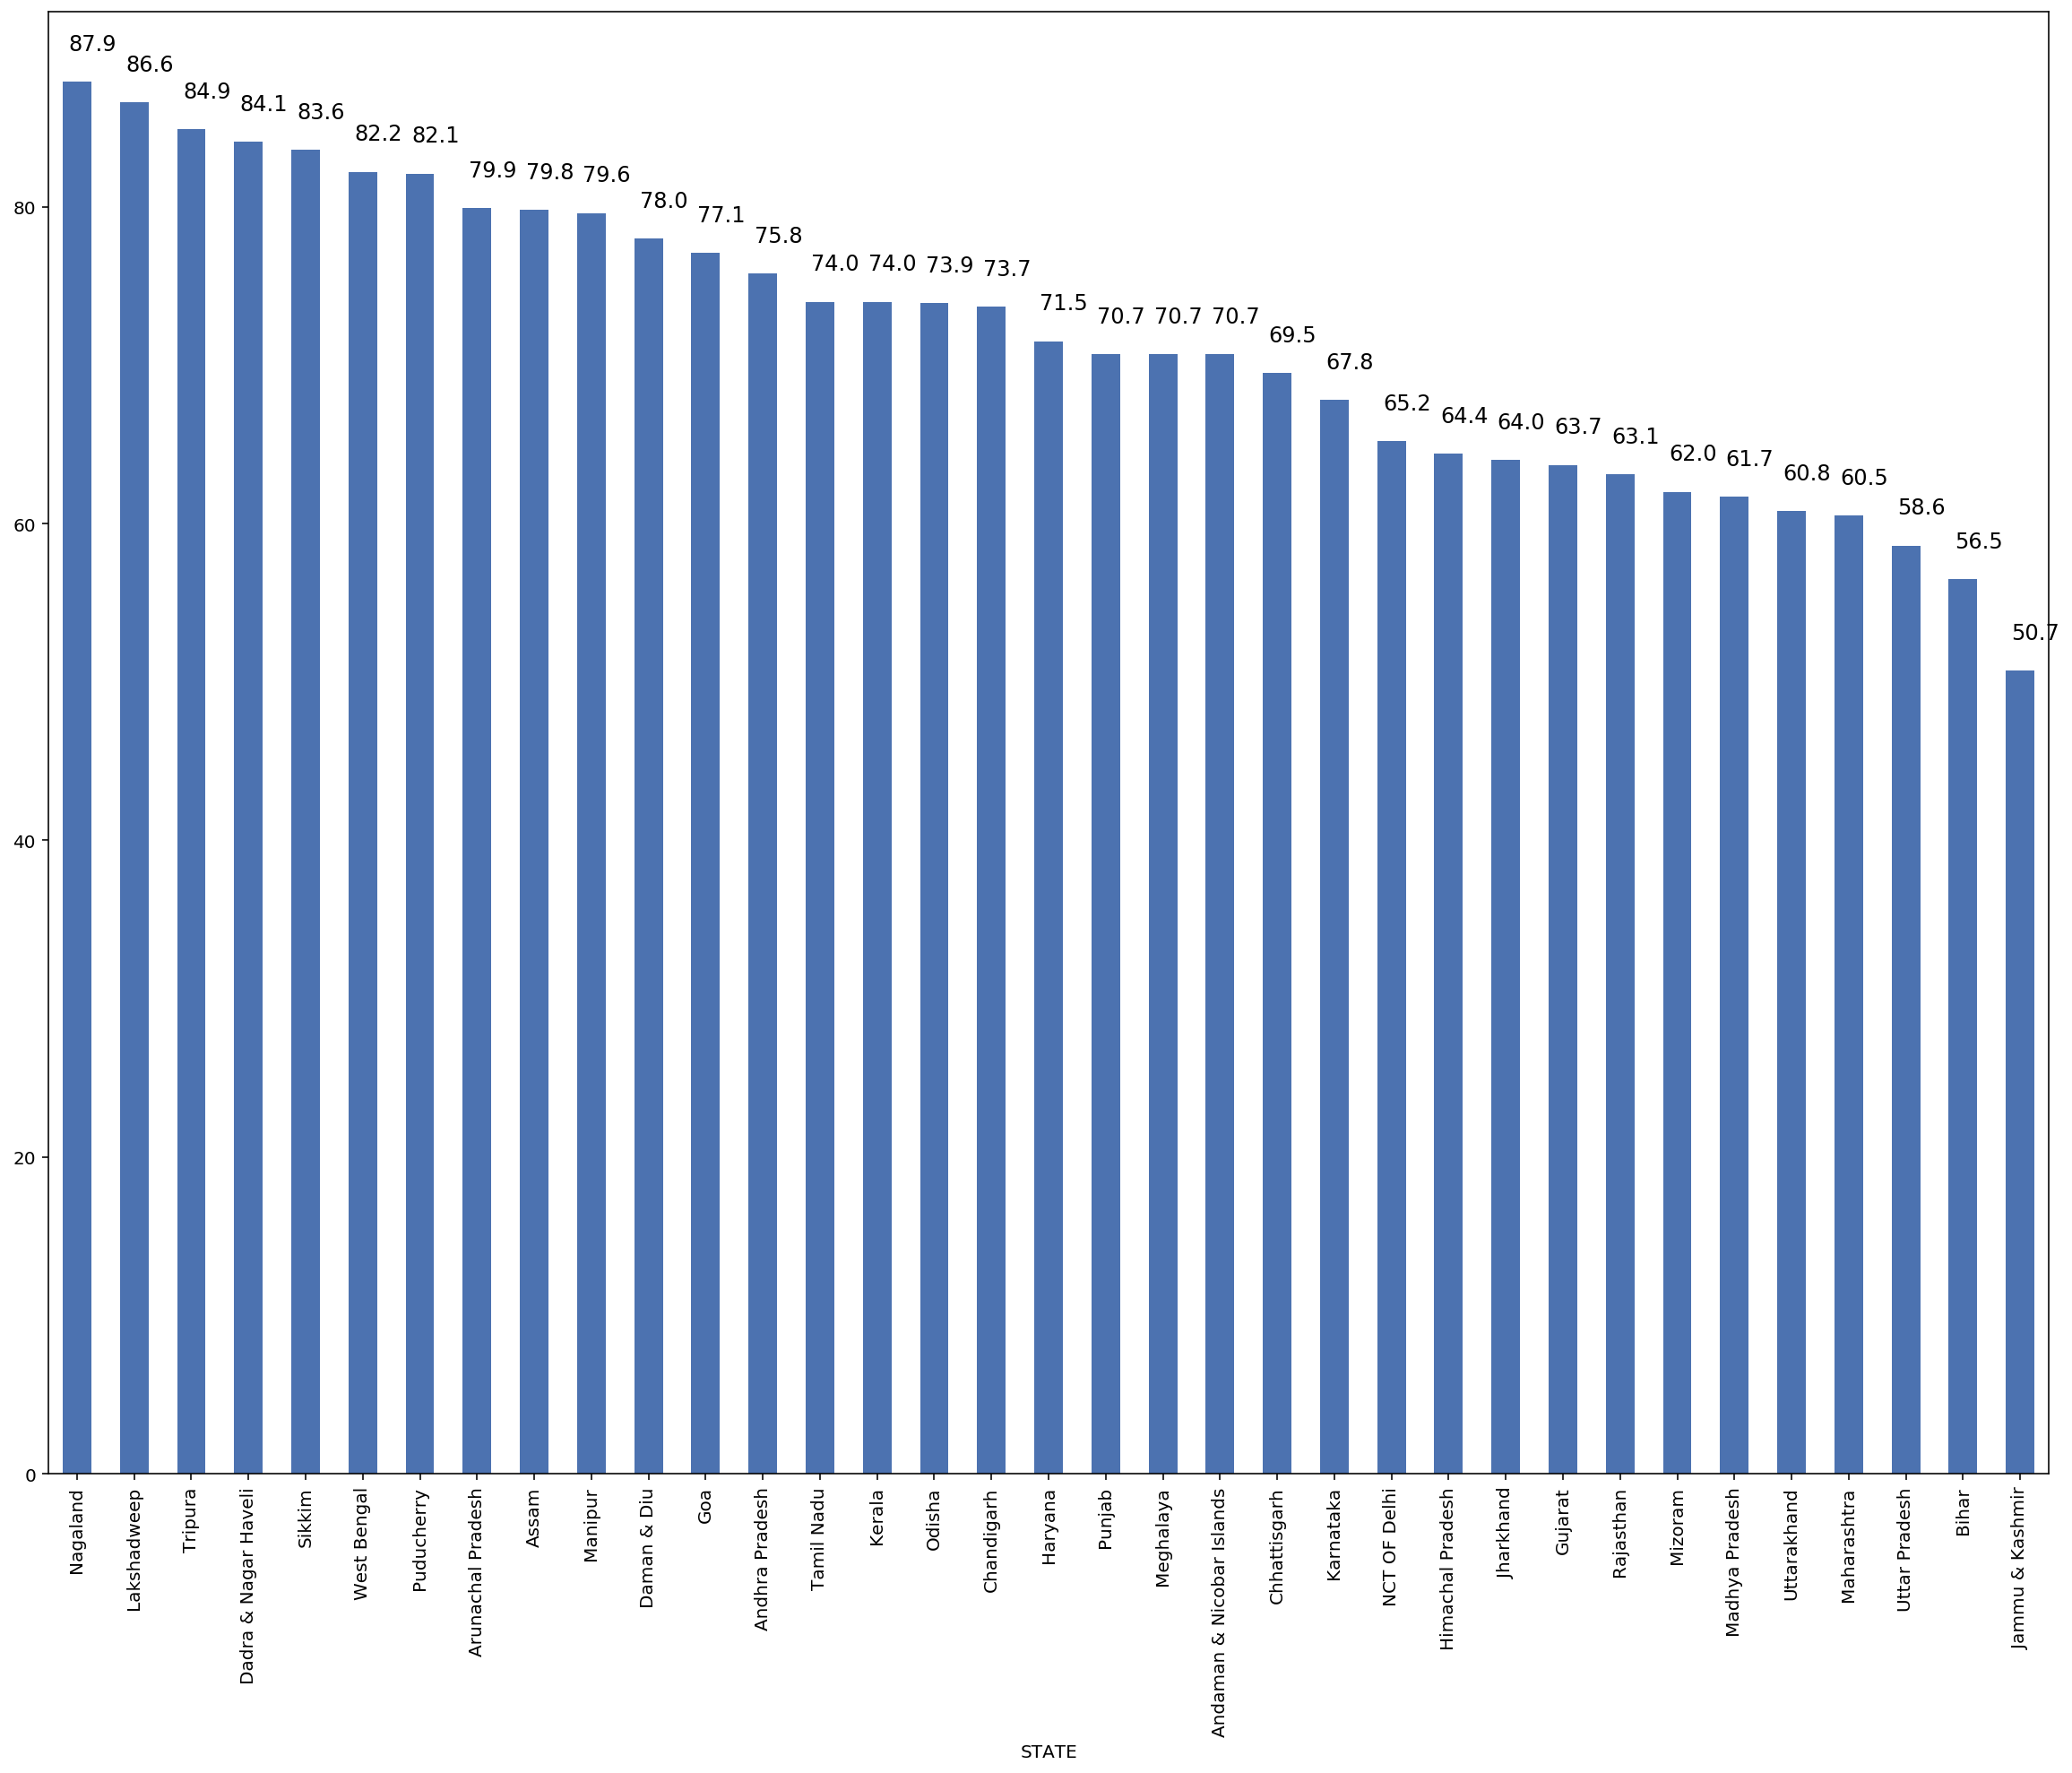

In [133]:
pollper14 = df_electrol_data14.groupby("STATE").mean()
LS14 = pollper14[['POLL PERCENTAGE']].round(1).sort_values('POLL PERCENTAGE',ascending=False)
ax14 =LS14['POLL PERCENTAGE'].plot(kind='bar',figsize=(20, 15))
for p in ax14.patches:
    ax14.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2),fontsize=12)


Text(0.5, 1.0, 'Poll Percentage of States 2009 and 2014')

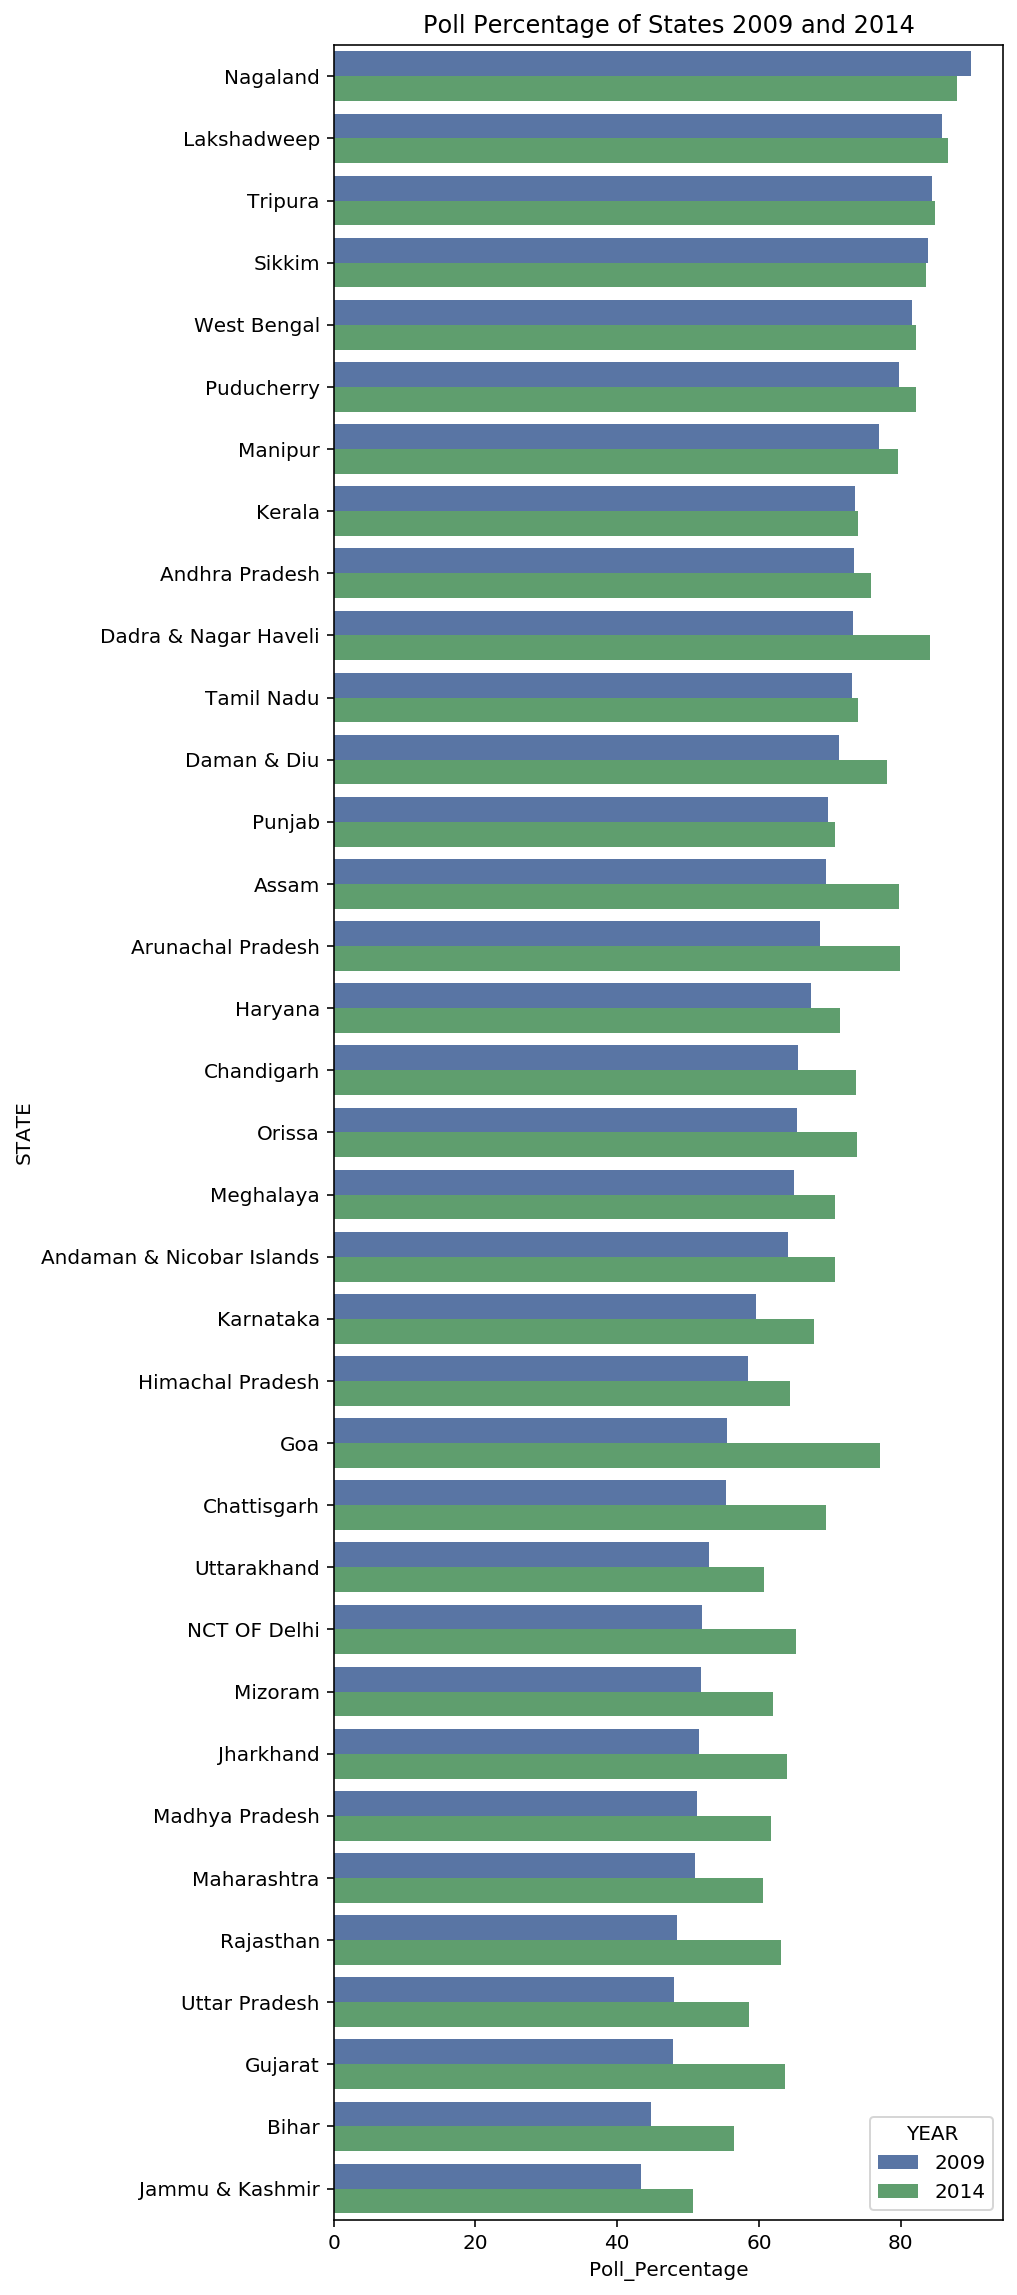

In [134]:
LS09Elec = LS09Elec.groupby('STATE').mean()
LS09 = LS09Elec[['POLL PERCENTAGE']].sort_values('POLL PERCENTAGE',ascending=False).to_dict()
Y09=[2009 for i in range(35)]
S09=list(LS09['POLL PERCENTAGE'].keys())
P09=list(LS09['POLL PERCENTAGE'].values())


LS14Elec = LS14Elec.groupby('STATE').mean()
LS14 = LS14Elec[['POLL PERCENTAGE']].sort_values('POLL PERCENTAGE',ascending=False).to_dict()
Y14=[2014 for i in range(35)]
S14=list(LS14['POLL PERCENTAGE'].keys())
P14=list(LS14['POLL PERCENTAGE'].values())
Data = {'YEAR':Y09+Y14,'STATE':S09+S14,'Poll_Percentage':P09+P14}
DF = pd.DataFrame(data=Data)
ax = plt.subplots(figsize=(6, 20))
sns.barplot(x=DF.Poll_Percentage,y=DF.STATE,hue=DF.YEAR)
plt.title('Poll Percentage of States 2009 and 2014')

In [135]:
df_candidate_data09["Alliance"] = df_candidate_data09["Party Abbreviation"]

df_candidate_data09["Alliance"] = df_candidate_data09["Alliance"].replace(to_replace =["INC","AITC","DMK","NCP","NC","JMM","MUL","VCK","KEC(M)","AIMIM"],value="UPA")
df_candidate_data09["Alliance"] = df_candidate_data09["Alliance"].replace(to_replace =["BJP","JD(U)","SHS","RLD","SAD","TRS","AGP","INLD"],value="NDA")
df_candidate_data09["Alliance"] = df_candidate_data09["Alliance"].replace(to_replace =["CPM","CPI","RSP","AIFB","BSP","BJD","ADMK","TDP","JD(S)","MDMK","HJS","PMK"],value="Third Front")
df_candidate_data09["Alliance"] = df_candidate_data09["Alliance"].replace(to_replace =["SP","RJD","LJP"],value="Fourth Front")
df_candidate_data09["Alliance"] = df_candidate_data09["Alliance"].replace(to_replace =["AUDF","JKM(P)","NPF","BOPF","SWP","BKA","SDF","IND","JKN","HJCBL","BVA","JVN","JVM"],value="Others")                                                

In [136]:
df_candidate_data14["Alliance"] = df_candidate_data14["Party Abbreviation"]

df_candidate_data14["Alliance"] = df_candidate_data14["Alliance"].replace(to_replace =['INC','NCP', 'RJD', 'DMK', 'IUML', 'JMM','JD(s)','KC(M)','RLD','RSP','CMP(J)','KC(J)','PPI','MD'],value="UPA")
df_candidate_data14["Alliance"] = df_candidate_data14["Alliance"].replace(to_replace =['BJP','SHS', 'LJP', 'SAD', 'RLSP', 'AD','PMK','NPP','AINRC','NPF','RPI(A)','BPF','JD(U)','SDF','NDPP','MNF','RIDALOS','KMDK','IJK','PNK','JSP','GJM','MGP','GFP','GVP','AJSU','IPFT','MPP','KPP','JKPC','KC(T)','BDJS','AGP','JSS','PPA','UDP','HSPDP','PSP','JRS','KVC','PNP','SBSP','KC(N)','PDF','MDPF'],value="NDA")

df_candidate_data14["Alliance"] = df_candidate_data14["Alliance"].replace(to_replace =['YSRCP',"AITC",'AAAP',"BJD","ADMK",'IND', 'AIUDF', 'BLSP', 'JKPDP',"CPM","TRS","TDP","SP", 'JD(S)', 'INLD', 'CPI', 'AIMIM', 'KEC(M)','SWP', 'NPEP', 'JKN', 'AIFB', 'MUL', 'AUDF', 'BOPF', 'BVA', 'HJCBL', 'JVM','MDMK'],value="Others")                            


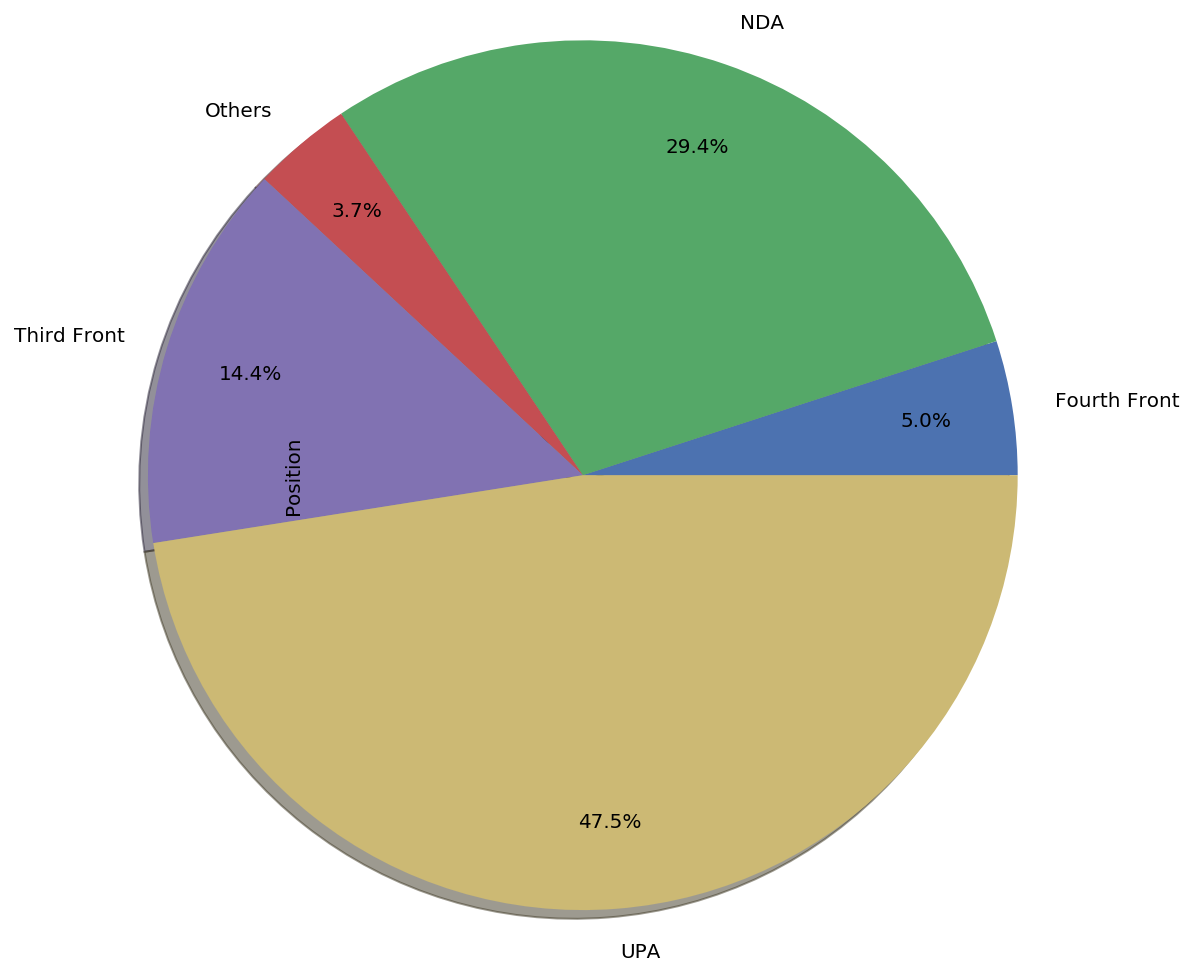

In [137]:
SeatsWin = df_candidate_data09[(df_candidate_data09.Position==1)].groupby(['Alliance'])['Position'].sum()
SeatsWin
SeatsWin.plot(kind ="pie",autopct='%1.1f%%',shadow=True,pctdistance=0.8,radius = 2)

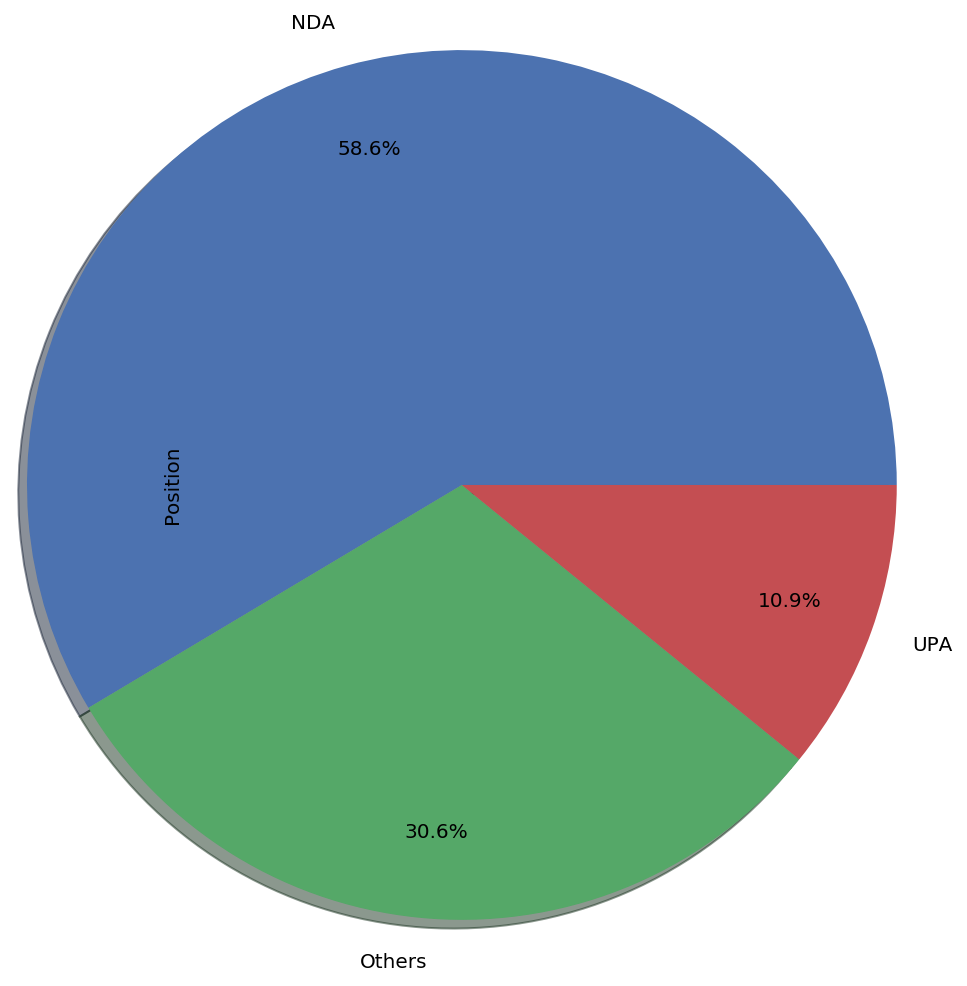

In [138]:
SeatsWin14 = df_candidate_data14[(df_candidate_data14.Position==1)].groupby(['Alliance'])['Position'].sum()

SeatsWin14.plot(kind ="pie",autopct='%1.1f%%',shadow=True,pctdistance=0.8,radius = 2)

In [139]:
s09 = df_candidate_data09[df_candidate_data09["Position"]==1].groupby("State name")["Alliance"].value_counts()
alliance09 = df_candidate_data09[df_candidate_data09["Position"]==1]["Alliance"].unique()

Text(0, 0.5, 'No. of seats')

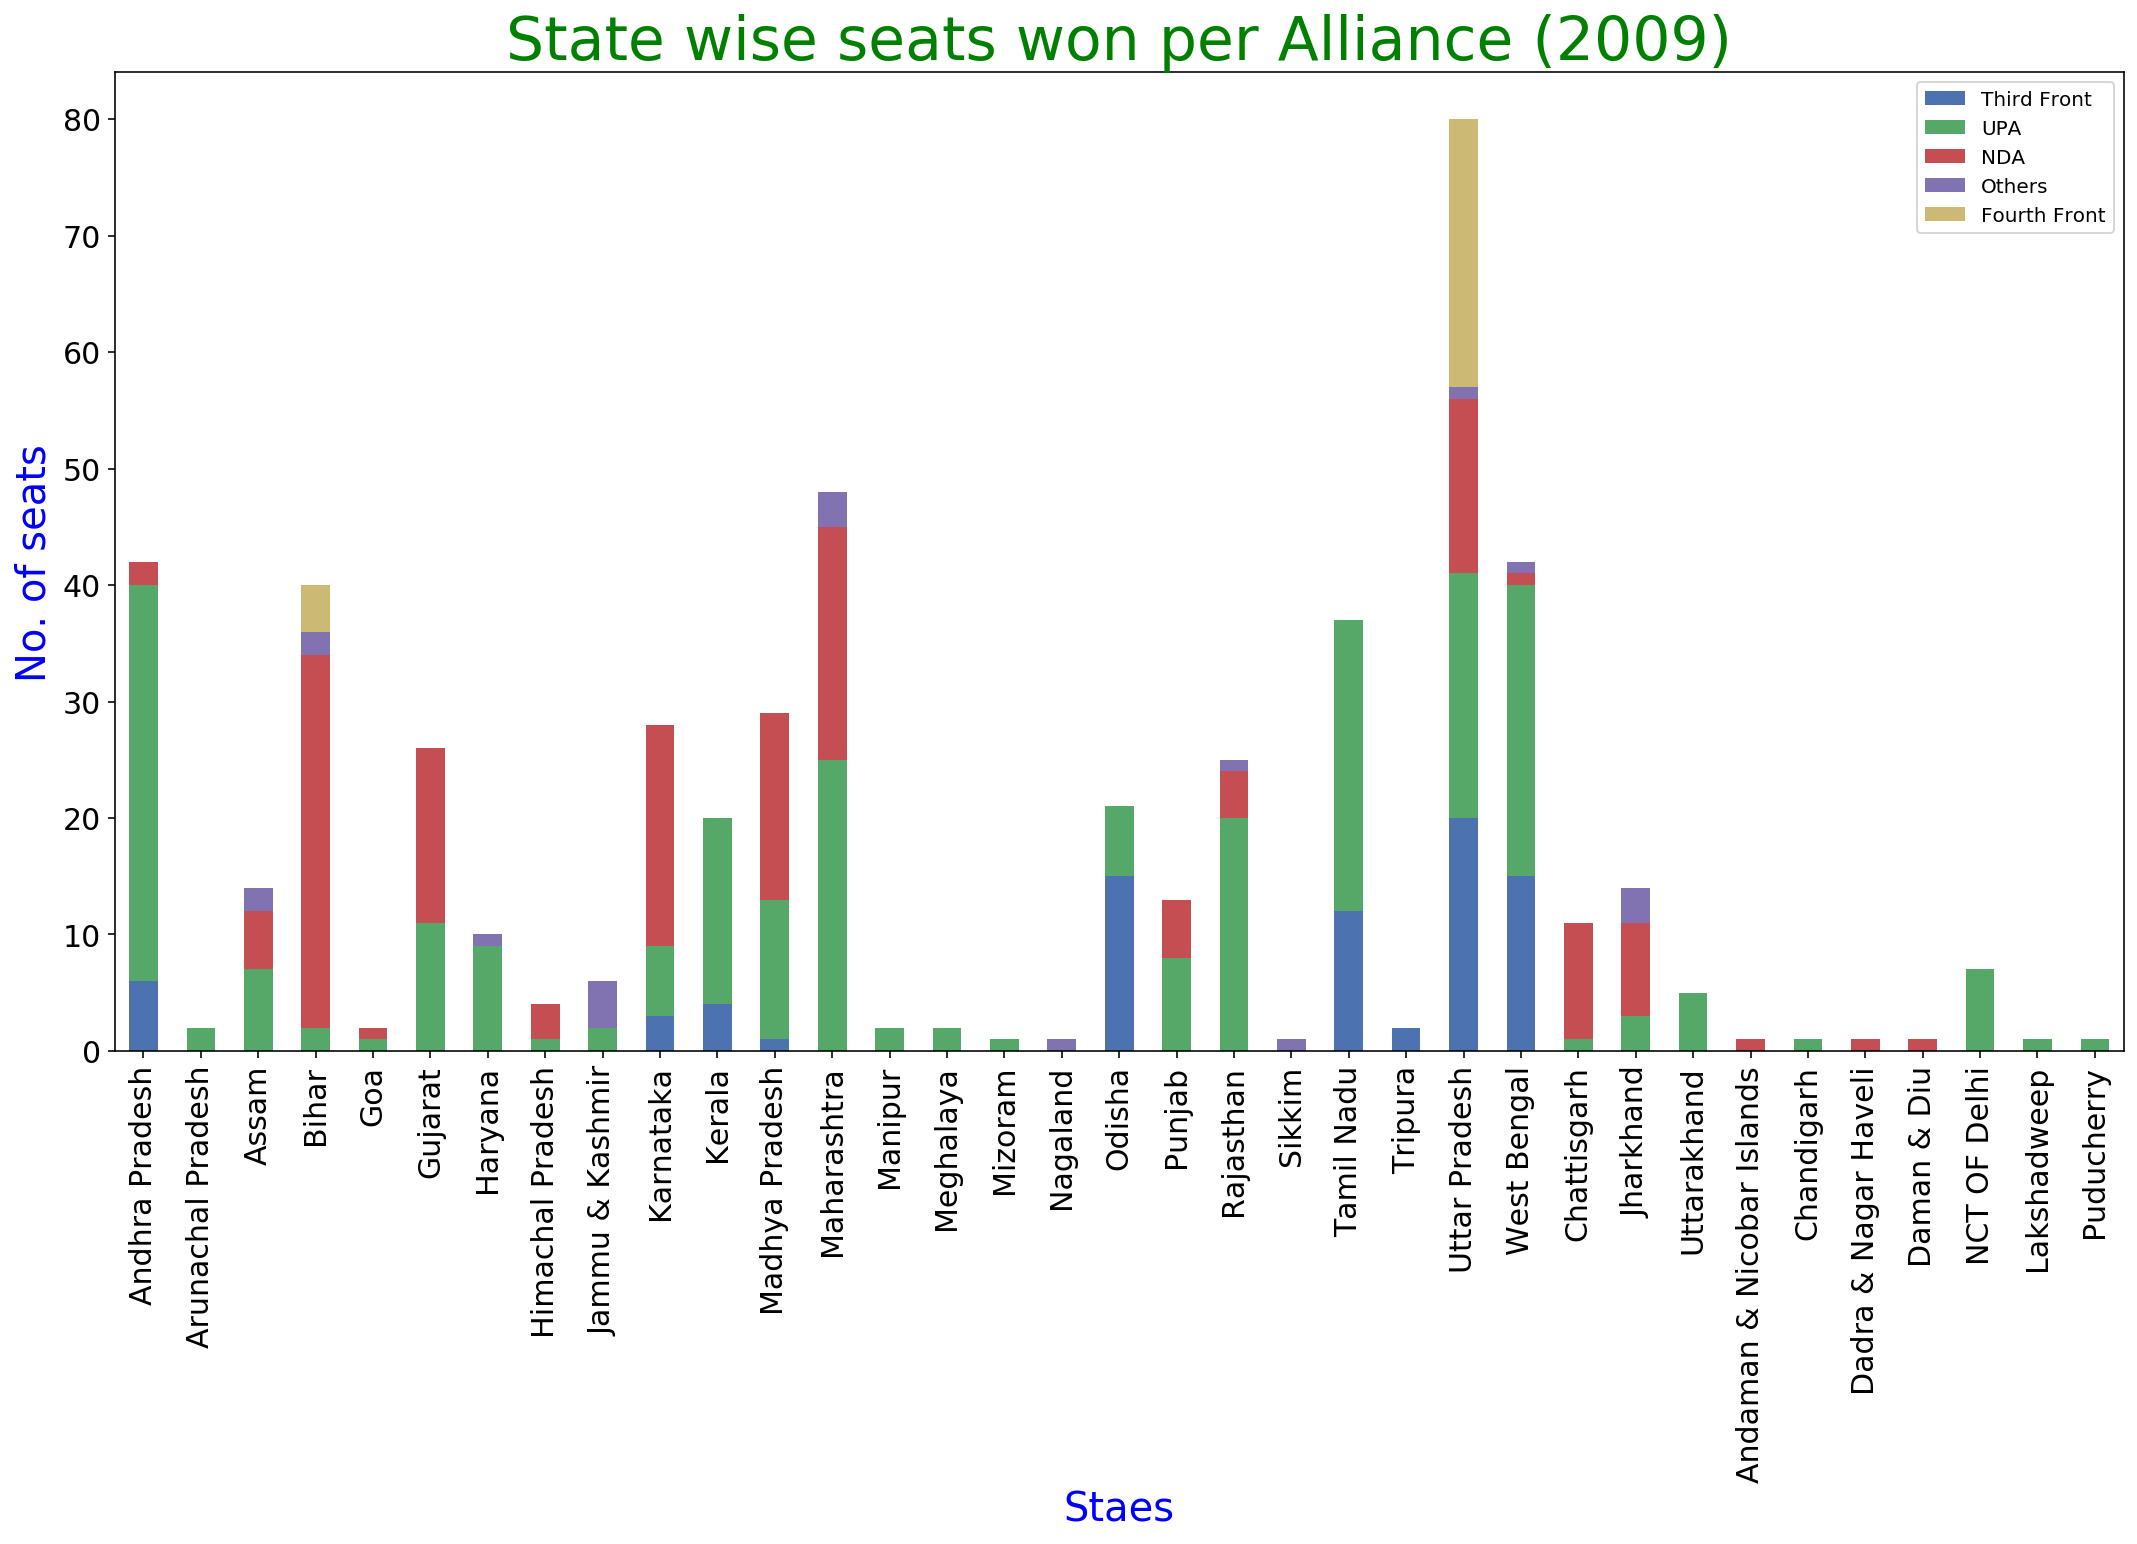

In [140]:
l = []
for v in ["Andhra Pradesh", 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry']:
         win_party09 = s09[v][alliance09]
         l.append(win_party09.values)
            
df = pd.DataFrame(l,index=["Andhra Pradesh", 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],columns=alliance09)
s=df.plot(kind="bar",stacked=True,figsize=(18,9),fontsize=15)
s.set_title("State wise seats won per Alliance (2009)",color='g',fontsize=30)
s.set_xlabel("Staes",color='b',fontsize=20)
s.set_ylabel("No. of seats",color='b',fontsize=20)

In [141]:
s14 = df_candidate_data14[df_candidate_data14["Position"]==1].groupby("State name")["Alliance"].value_counts()
alliance14 = df_candidate_data14[df_candidate_data14["Position"]==1]["Alliance"].unique()

Text(0, 0.5, 'Seats')

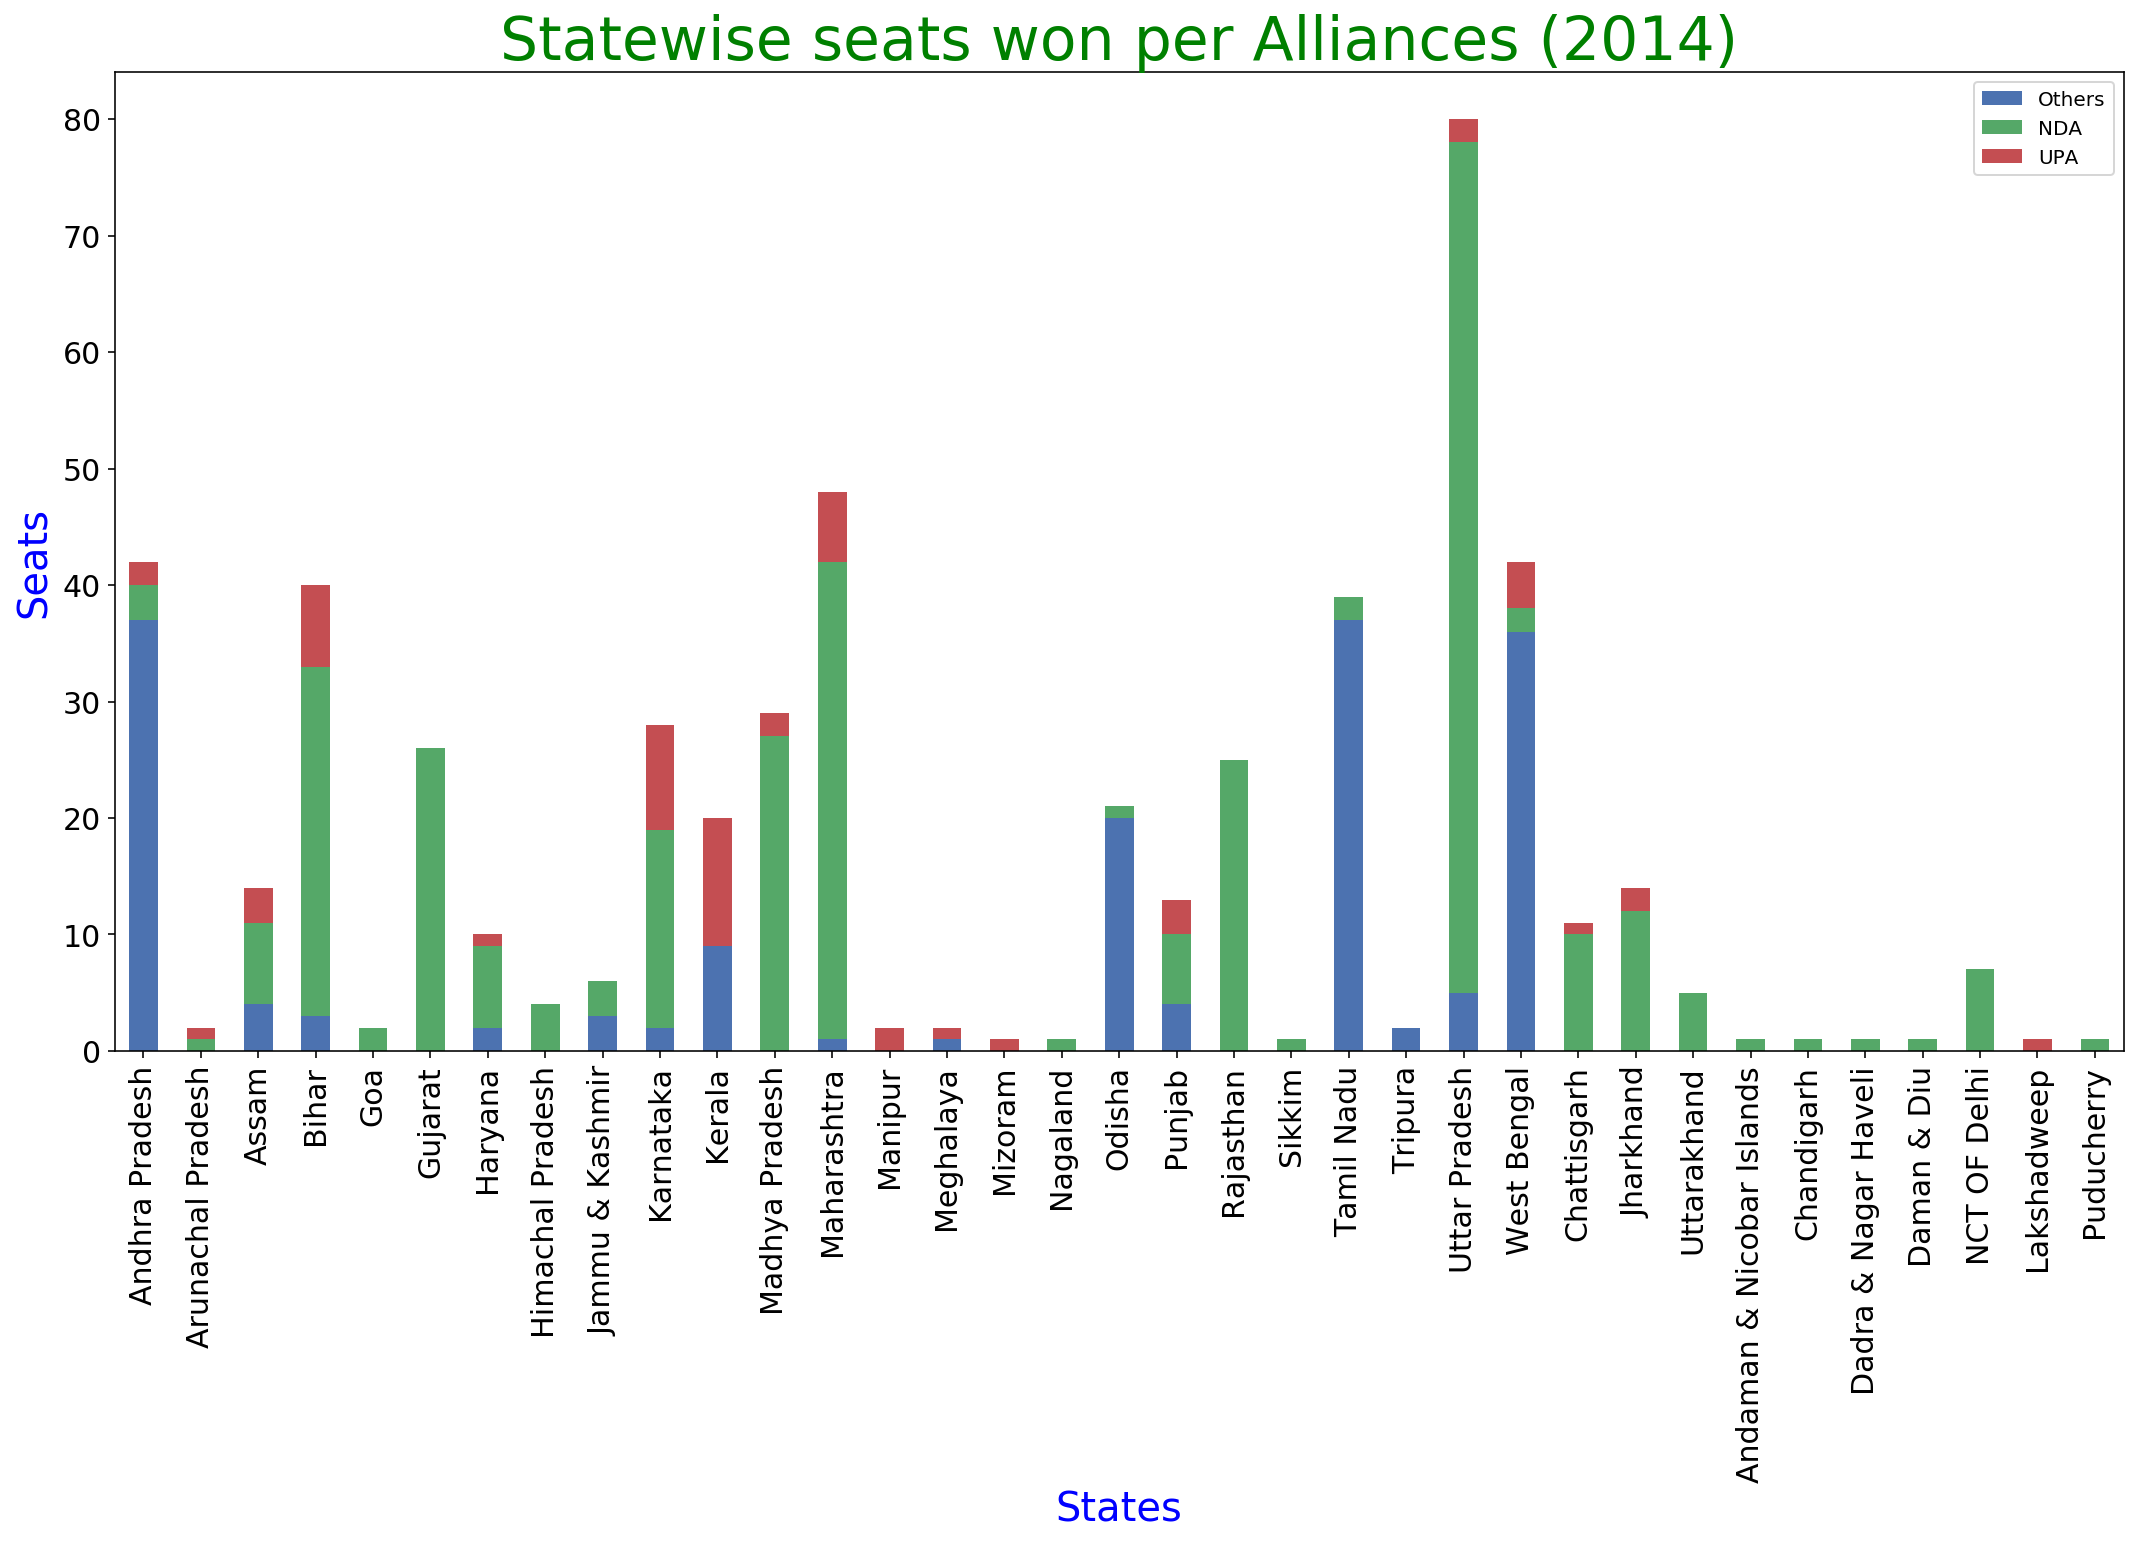

In [142]:
l = []
for v in ["Andhra Pradesh", 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry']:
         win_party = s14[v][alliance14]
         l.append(win_party.values)
            
df = pd.DataFrame(l,index=["Andhra Pradesh", 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],columns=alliance14)
s=df.plot(kind="bar",stacked=True,figsize=(18,9),fontsize=15)
s.set_title("Statewise seats won per Alliances (2014)",color='g',fontsize=30)
s.set_xlabel("States",color='b',fontsize=20)
s.set_ylabel("Seats",color='b',fontsize=20)

In [143]:
df = pd.read_csv("C:\\Users\\anand\\Desktop\\data sets\\datasets_536270_983499_LS_2.0.csv")
df.head()

STATE CONSTITUENCY                   NAME  WINNER PARTY SYMBOL  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP  Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0   TRS    Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC   Hand   
3      Telangana     ADILABAD                   NOTA       0  NOTA    NaN   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP  Lotus   

  GENDER CRIMINAL\nCASES   AGE CATEGORY      EDUCATION  \
0   MALE              52  52.0       ST      12th Pass   
1   MALE               0  54.0       ST  Post Graduate   
2   MALE               3  52.0       ST      12th Pass   
3    NaN             NaN   NaN      NaN            NaN   
4   MALE               5  58.0       SC      Doctorate   

                        ASSETS                  LIABILITIES  GENERAL\nVOTES  \
0    Rs 30,99,414\n ~ 30 Lacs+      Rs 2,31,450\n ~ 2 Lacs+          376892   
1  Rs 1,84,77,888\n ~ 1 Crore+      Rs 8,47,000\n ~ 8 Lacs+          318665   
2  Rs 3,64,91,000\n ~ 3 Crore+  Rs 1,53,00,000\n ~ 1 Crore+          314057   
3                          NaN                          NaN           13030   
4  Rs 7,42,74,036\n ~ 7 Crore+    Rs 86,06,522\n ~ 86 Lacs+          644459   

   POSTAL\nVOTES  TOTAL\nVOTES  OVER TOTAL ELECTORS \nIN CONSTITUENCY  \
0            482        377374                              25.330684   
1            149        318814                              21.399929   
2            181        314238                              21.092771   
3              6         13036                               0.875023   
4           2416        646875                              33.383823   

   OVER TOTAL VOTES POLLED \nIN CONSTITUENCY  TOTAL ELECTORS  
0                                  35.468248         1489790  
1                                  29.964370         1489790  
2                                  29.534285         1489790  
3                                   1.225214         1489790  
4                                  56.464615         1937690

In [144]:
print('Number of rows and columns :',df.shape) # Number of rows and columns

Number of rows and columns : (2263, 19)


In [145]:
#df[df['NAME']=='NOTA']=df[df['NAME']=='NOTA'].replace(np.nan,'NOTA')

In [146]:
#df['ASSETS']=df['ASSETS'].replace('Not Available','0')
#df['LIABILITIES']=df['LIABILITIES'].replace('Not Available','0')
#df['ASSETS']=df['ASSETS'].replace('Nil','0')
#df['LIABILITIES']=df['LIABILITIES'].replace('Nil','0')
#df['LIABILITIES']=df['LIABILITIES'].replace('NIL','0')
#df['ASSETS']=df['ASSETS'].replace('`','0')
#df['LIABILITIES']=df['LIABILITIES'].replace('`','0')

#df['ASSETS']=df['ASSETS'].replace('NOTA','0')
#df['LIABILITIES']=df['LIABILITIES'].replace('NOTA','0')
#df['AGE']=df['AGE'].replace('NOTA',0)
#df['CRIMINAL\nCASES']=df['CRIMINAL\nCASES'].replace('NOTA',0)
#df['CRIMINAL\nCASES'].replace('Not Available','0',inplace=True)
#df['CRIMINAL\nCASES']=df['CRIMINAL\nCASES'].astype('int')


#df['ASSETS']=df['ASSETS'].replace(',','',regex=True)
#df['LIABILITIES']=df['LIABILITIES'].replace(',','',regex=True)
#df['ASSETS']=df['ASSETS'].replace('Nil','0',regex=True)
#df['LIABILITIES']=df['LIABILITIES'].replace('Nil','0',regex=True)
#df['ASSETS']=df['ASSETS'].str.extract(pat='([0-9]+)')
#df['LIABILITIES']=df['LIABILITIES'].str.extract(pat='([0-9]+)') 

#df['ASSETS']=df['ASSETS'].astype('float')
#df['LIABILITIES']=df['LIABILITIES'].astype('float')

In [147]:
#df['Is_NOTA']=df['NAME']=='NOTA'

In [148]:
df.dtypes

STATE                                         object
CONSTITUENCY                                  object
NAME                                          object
WINNER                                         int64
PARTY                                         object
SYMBOL                                        object
GENDER                                        object
CRIMINAL\nCASES                               object
AGE                                          float64
CATEGORY                                      object
EDUCATION                                     object
ASSETS                                        object
LIABILITIES                                   object
GENERAL\nVOTES                                 int64
POSTAL\nVOTES                                  int64
TOTAL\nVOTES                                   int64
OVER TOTAL ELECTORS \nIN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    float64
TOTAL ELECTORS                                

In [149]:
df.columns = df.columns.str.replace('\n',' ') # To rename columns

In [150]:
df.dtypes

STATE                                        object
CONSTITUENCY                                 object
NAME                                         object
WINNER                                        int64
PARTY                                        object
SYMBOL                                       object
GENDER                                       object
CRIMINAL CASES                               object
AGE                                         float64
CATEGORY                                     object
EDUCATION                                    object
ASSETS                                       object
LIABILITIES                                  object
GENERAL VOTES                                 int64
POSTAL VOTES                                  int64
TOTAL VOTES                                   int64
OVER TOTAL ELECTORS  IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED  IN CONSTITUENCY    float64
TOTAL ELECTORS                                int64
dtype: objec

In [151]:
df.describe()

WINNER          AGE  GENERAL VOTES  POSTAL VOTES   TOTAL VOTES  \
count  2263.000000  2018.000000   2.263000e+03   2263.000000  2.263000e+03   
mean      0.238179    52.273538   2.615991e+05    990.710561  2.625898e+05   
std       0.426064    11.869373   2.549906e+05   1602.839174  2.559822e+05   
min       0.000000    25.000000   1.339000e+03      0.000000  1.342000e+03   
25%       0.000000    43.250000   2.103450e+04     57.000000  2.116250e+04   
50%       0.000000    52.000000   1.539340e+05    316.000000  1.544890e+05   
75%       0.000000    61.000000   4.858040e+05   1385.000000  4.872315e+05   
max       1.000000    86.000000   1.066824e+06  19367.000000  1.068569e+06   

       OVER TOTAL ELECTORS  IN CONSTITUENCY  \
count                           2263.000000   
mean                              15.811412   
std                               14.962861   
min                                0.097941   
25%                                1.296518   
50%                               10.510553   
75%                               29.468185   
max                               51.951012   

       OVER TOTAL VOTES POLLED  IN CONSTITUENCY  TOTAL ELECTORS  
count                               2263.000000    2.263000e+03  
mean                                  23.190525    1.658016e+06  
std                                   21.564758    3.145187e+05  
min                                    1.000039    5.518900e+04  
25%                                    1.899502    1.530014e+06  
50%                                   16.221721    1.679030e+06  
75%                                   42.590233    1.816857e+06  
max                                   74.411856    3.150313e+06

#### Observations:
* There were 2018 candidates who contested 2019 LokSabha Election.
* Minimum age of the candidates was 25 whereas maximum age was 86.
* Average age of all the candidates who contested election was 52.
* 19367 postal votes were casted in the election.

### Percentage of missing valuesm

In [180]:
df1 = df[df['PARTY']!= 'NOTA']
percentage_missing_values = round(df1.isnull().sum()*100/len(df1),2).reset_index()
percentage_missing_values.columns = ['column_name','percentage_missing_values']
percentage_missing_values = percentage_missing_values.sort_values('percentage_missing_values',ascending = False)
percentage_missing_values

column_name  percentage_missing_values
0                                      STATE                        0.0
1                               CONSTITUENCY                        0.0
22                           LIABILITY_VALUE                        0.0
21                              ASSETS_RANGE                        0.0
20                              ASSETS_VALUE                        0.0
19                                 Party New                        0.0
18                            TOTAL ELECTORS                        0.0
17  OVER TOTAL VOTES POLLED  IN CONSTITUENCY                        0.0
16      OVER TOTAL ELECTORS  IN CONSTITUENCY                        0.0
15                               TOTAL VOTES                        0.0
14                              POSTAL VOTES                        0.0
13                             GENERAL VOTES                        0.0
12                               LIABILITIES                        0.0
11                                    ASSETS                        0.0
10                                 EDUCATION                        0.0
9                                   CATEGORY                        0.0
8                                        AGE                        0.0
7                             CRIMINAL CASES                        0.0
6                                     GENDER                        0.0
5                                     SYMBOL                        0.0
4                                      PARTY                        0.0
3                                     WINNER                        0.0
2                                       NAME                        0.0
23                           LIABILITY_RANGE                        0.0

## If we exclude NOTA(None Of The Above) rows, there are no missing values.

### Total Constituencies per State

In [153]:
constituencies_per_state = df.groupby('STATE')['CONSTITUENCY'].nunique().reset_index().sort_values('CONSTITUENCY',ascending = False)
fig = px.bar(constituencies_per_state, x='STATE', y='CONSTITUENCY', color='CONSTITUENCY', height=600)
fig.show()

# Uttar Pradesh has the highest of 80 constituencies.

# Candidates by Party

In [154]:
candidates_per_party = df.PARTY.value_counts().reset_index().rename(columns = {'index':'Party','PARTY':'Total Candidates'}).head(50)
candidates_per_party = candidates_per_party[candidates_per_party['Party'] != 'NOTA']
fig = px.bar(candidates_per_party, x='Party', y='Total Candidates', color='Total Candidates', height=500)
fig.show()

BJP had fielded the highest of 420 candidates whereas INC had 413 candidates.

### Partywise Vote Share

In [181]:
vote_share_top5 = df.groupby('PARTY')['TOTAL VOTES'].sum().nlargest(5).index.tolist()
def vote_share(row):
    if row['PARTY'] not in vote_share_top5:
        return 'Other'
    else:
        return row['PARTY']
df['Party New'] = df.apply(vote_share,axis =1)
counts = df.groupby('Party New')['TOTAL VOTES'].sum()#(sort=True)
labels = counts.index
values = counts.values
pie = go.Pie(labels=labels, values=values, marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Partywise Vote Share')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

BJP got the highest vote share of 38.5% whereas INC was the distant second with 20.1% votes.

### Seats Won by Party

In [156]:
winning_candidates_per_party = df.groupby(['PARTY','SYMBOL'])['WINNER'].sum().reset_index().sort_values('WINNER',ascending = False)
winning_candidates_per_party = winning_candidates_per_party[winning_candidates_per_party['WINNER'] > 0]
fig = px.bar(winning_candidates_per_party, x='PARTY', y='WINNER',hover_data =['SYMBOL'], color='WINNER', height=500)
fig.show()

BJP achieved a landslide victory winning 300 seats whereas INC won only 52 seats.

### Age of Candidates



In [157]:
fig = px.histogram(df, x="AGE")
fig.show()


Age of all the candidates who contested election follows normal distribution with mean 52.

### Age of Candidates by Gender

In [158]:
fig = px.histogram(df.dropna(), x="AGE", y="WINNER", color="GENDER", marginal="violin",hover_data=df.columns)
fig.show()

Average age females who contested election was slightly less than all the males who contested election.

### Youngest MP's in India

In [159]:
df_winners = df[df['WINNER']==1]
df_winners = df_winners.sort_values('AGE').head(10)
fig = px.bar(df_winners, x='NAME', y='AGE', color='AGE', height=500, hover_data=['PARTY','SYMBOL','CONSTITUENCY','STATE'])
fig.show()

### Oldest MP's in India

In [160]:
df_winners = df[df['WINNER']==1]
df_winners = df_winners.sort_values('AGE',ascending=False).head(10)
fig = px.bar(df_winners, x='NAME', y='AGE', color='AGE', height=500, hover_data=['PARTY','SYMBOL','CONSTITUENCY','STATE'])
fig.show()

### Criminal Cases against Candidates

In [161]:
df['CRIMINAL CASES'] = df['CRIMINAL CASES'].replace('Not Available','0')
df['CRIMINAL CASES'] = df['CRIMINAL CASES'].fillna(0)
df['CRIMINAL CASES'] = df['CRIMINAL CASES'].astype(int)
criminal_cases = df[(df['CRIMINAL CASES'] != 'Not Available') & (df['CRIMINAL CASES'].notnull())]
criminal_cases = criminal_cases.groupby('PARTY')['CRIMINAL CASES'].sum().reset_index().sort_values('CRIMINAL CASES',ascending=False).head(30)
fig = px.bar(criminal_cases, x='PARTY', y='CRIMINAL CASES', color='CRIMINAL CASES', height=500)
fig.show()

BJP Candidates had highest number of criminal cases against them. INC cnadidates were not too far behind.

### Educational Qualification of Candidates

In [162]:
df['EDUCATION'] = df['EDUCATION'].str.replace('Post Graduate\n','Post Graduate')
df['EDUCATION'] = df['EDUCATION'].fillna('Others') 
education = df[df['EDUCATION'] != 'Not Available']
education = education['EDUCATION'].value_counts().reset_index()
education.columns = ['EDUCATION','COUNT']
fig = px.bar(education, x='EDUCATION', y='COUNT', color='COUNT', height=500)
fig.show()

### Educational Qualification of Winning Candidates

In [163]:
won_educated_candidates = df[df['WINNER']==1]
fig = px.bar(won_educated_candidates, x='EDUCATION', y='WINNER', color='EDUCATION', height=500).update_xaxes(categoryorder = "total descending")
fig.show()

### Classification of Winning & Losing Candidates based on Age

In [164]:
fig = px.histogram(df.dropna(), x="AGE", y="PARTY", color="WINNER", marginal="violin",hover_data=df.columns)
fig.show()

### Candidates with Criminal Cases

In [165]:
df_criminal_cases = df.loc[(df['CRIMINAL CASES'].notnull()) & (df['CRIMINAL CASES'] != 'Not Available')]
def criminal_cases(row):
    if row['CRIMINAL CASES'] == 0:
        return 'No'
    else:
        return 'Yes'
df_criminal_cases['HAS CRIMINAL CASE'] = df_criminal_cases.apply(criminal_cases,axis = 1)
df_criminal_cases_count = df_criminal_cases.groupby(['HAS CRIMINAL CASE','WINNER']).size().reset_index()
df_criminal_cases_count.columns = ['HAS CRIMINAL CASE','WINNER','COUNT']
# pivot_df_criminal_cases_count = df_criminal_cases_count.pivot(index='HAS CRIMINAL CASE', columns='WINNER', values='COUNT')
# pivot_df_criminal_cases_count.plot.bar(stacked=True,figsize=(10,7))
# plt.xticks(rotation=0)
# plt.show()
fig = px.bar(df_criminal_cases_count, x="HAS CRIMINAL CASE", y="COUNT", color='WINNER')
fig.show()

It looks like having criminal cases has no effect on election result!!

### Percentage of Voting by State

In [166]:
df_votes_perct_constituency = df.groupby(['STATE','CONSTITUENCY','TOTAL ELECTORS'])['TOTAL VOTES'].sum().reset_index()
df_votes_perct_constituency['% VOTED IN CONSTITUENCY'] = round(df_votes_perct_constituency['TOTAL VOTES']*100/df_votes_perct_constituency['TOTAL ELECTORS'],2)
df_voters_state = df[['STATE','CONSTITUENCY','TOTAL ELECTORS']].drop_duplicates()
df_voters_state = df_voters_state.groupby('STATE')['TOTAL ELECTORS'].sum().reset_index()
df_votes_state = df.groupby('STATE')['TOTAL VOTES'].sum().reset_index().sort_values('TOTAL VOTES',ascending = False)
df_votes_perct_state = pd.merge(df_votes_state,df_voters_state, on ='STATE',how = 'left')
df_votes_perct_state['% VOTED IN STATE'] = round(df_votes_perct_state['TOTAL VOTES']*100/df_votes_perct_state['TOTAL ELECTORS'],2)
df_votes_perct_state = df_votes_perct_state.sort_values('% VOTED IN STATE',ascending = False)
fig = px.bar(df_votes_perct_state, x='STATE', y='% VOTED IN STATE', color='% VOTED IN STATE', height=500)
fig.show()

Lakshadweep witnessed highest percentage of voting whereas voting was least in Jammu & Kashmir.

In [167]:
fig = px.bar(df_votes_state, x='STATE', y='TOTAL VOTES', color='TOTAL VOTES', height=500)
fig.show()

Utatr Pradesh has highest number of people who are eligible for voting.

### Assests of Candidates

In [168]:
df_assets = df.copy()
df_assets[['ASSETS2','ASSETS_VALUE']] = df_assets['ASSETS'].str.split('~',expand=True)
df_assets.drop(['ASSETS2'],axis =1,inplace=True)
df_assets = df_assets[df_assets['ASSETS_VALUE'].notnull()]
def asset_range(row):
    if row['ASSETS_VALUE'].endswith('Crore+'):
        return 'Crore+'
    elif row['ASSETS_VALUE'].endswith('Lacs+'):
        return 'Lakh+'
    elif row['ASSETS_VALUE'].endswith('Thou+'):
        return 'Thousand+'
    else:
        return 'NAN'

df_assets['ASSETS_RANGE'] = df_assets.apply(asset_range,axis =1)
df_assets['COUNT'] = 1
df_assets = df_assets[df_assets['ASSETS_RANGE'] != 'NAN']
counts = df_assets.groupby('ASSETS_RANGE')['COUNT'].sum()
labels = counts.index
values = counts.values
pie = go.Pie(labels=labels, values=values, marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Assests of Candidates')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

Almost 70% of the candidates who contested election in 2019 had assets worth more than a crore!!!

### Reservations

In India, reservations exist in almost every field. Entire political game runs on the basis of religion,caste and all other forms of reservations.

In [169]:
df_category = df['CATEGORY'].value_counts().reset_index()
df_category.columns = ['CATEGORY','COUNT']
fig = px.bar(df_category, x='CATEGORY', y='COUNT', color='CATEGORY', height=500)
fig.show()

Gender of Candidates

In [170]:
df_gender = df['GENDER'].value_counts().reset_index()
df_gender.columns = ['GENDER','COUNT']
pie = go.Pie(labels=df_gender['GENDER'], values=df_gender['COUNT'], marker=dict(line=dict(color='black', width=1)))
layout = go.Layout(title='Male vs Female Ratio - All Candidates')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

### Gender of Winning Candidates

In [171]:
df_gender_won =df[df['WINNER'] == 1]
df_gender_won = df_gender_won['GENDER'].value_counts().reset_index()
df_gender_won.columns = ['GENDER','COUNT']
pie = go.Pie(labels=df_gender_won['GENDER'], values=df_gender_won['COUNT'], marker=dict(line=dict(color='black', width=1)))
layout = go.Layout(title='Male vs Female Ratio - Winners')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

There is very clear gap between number of male & female representatives in the assembly.

# Winner Prediction Using Random Forest

In [172]:
df = df[df['PARTY']!= 'NOTA']
df[['ASSETS2','ASSETS_VALUE']] = df['ASSETS'].str.split('~',expand=True)
df.drop(['ASSETS2'],axis =1,inplace=True)
df = df[df['ASSETS_VALUE'].notnull()]
df['ASSETS_RANGE'] = df.apply(asset_range,axis =1)

df[['LIABILITY2','LIABILITY_VALUE']] = df['LIABILITIES'].str.split('~',expand=True)
df.drop(['LIABILITY2'],axis =1,inplace=True)
df = df[df['LIABILITY_VALUE'].notnull()]

def liability_range(row):
    if row['LIABILITY_VALUE'].endswith('Crore+'):
        return 'Crore+'
    elif row['LIABILITY_VALUE'].endswith('Lacs+'):
        return 'Lakh+'
    elif row['LIABILITY_VALUE'].endswith('Thou+'):
        return 'Thousand+'
    else:
        return 'NAN'
df['LIABILITY_RANGE'] = df.apply(liability_range,axis =1)

In order to predict the target variable "WINNER", first we need to select the columns necessary for prediction and exclude all the redundant columns. Also we nedd to categorize the columns into categorical & numerical columns.

In [173]:
df1 = df[['STATE','CONSTITUENCY','WINNER','Party New','SYMBOL','GENDER','CRIMINAL CASES','AGE','CATEGORY','EDUCATION','TOTAL VOTES','TOTAL ELECTORS','ASSETS_RANGE','LIABILITY_RANGE']]
cat_cols = ['STATE','CONSTITUENCY','Party New','SYMBOL','GENDER','CATEGORY','EDUCATION','ASSETS_RANGE','LIABILITY_RANGE']
num_cols = ['CRIMINAL CASES','AGE','TOTAL VOTES','TOTAL ELECTORS']

In [174]:
df_winner = df1['WINNER'].value_counts().reset_index()
df_winner.columns = ['RESULT','COUNT']
pie = go.Pie(labels=df_winner['RESULT'], values=df_winner['COUNT'], marker=dict(line=dict(color='black', width=1)))
layout = go.Layout(title='Total Candidates vs Winners')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

By looking at the above graph, we can clearly see that this dataset is imbalanced. So, in order to balance the dataset, we need to either upsample or down sample the dataset. Down sampling of majority class might result in loss of some important information. So, we will be up-sampling the minority class using **resample**. Before doing that we need to scale the categorical columns using **get_dummies** and the numerical columns using **StandardScaler** library.

### Data Scaling

In [175]:
dataset = pd.get_dummies(df1, columns = cat_cols)
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = num_cols
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

WINNER  CRIMINAL CASES       AGE  TOTAL VOTES  TOTAL ELECTORS  \
0       1        6.573192 -0.030456     0.321841       -0.541152   
1       0       -0.191676  0.138131     0.093010       -0.541152   
2       0        0.198605 -0.030456     0.075128       -0.541152   
4       1        0.458792  0.475303     1.374956        0.871231   
5       0       -0.191676 -0.451921     0.548309        0.871231   

   STATE_Andaman & Nicobar Islands  STATE_Andhra Pradesh  \
0                                0                     0   
1                                0                     0   
2                                0                     0   
4                                0                     0   
5                                0                     0   

   STATE_Arunachal Pradesh  STATE_Assam  STATE_Bihar  STATE_Chandigarh  \
0                        0            0            0                 0   
1                        0            0            0                 0   
2                        0            0            0                 0   
4                        0            0            0                 0   
5                        0            0            0                 0   

   STATE_Chhattisgarh  STATE_Dadra & Nagar Haveli  STATE_Daman & Diu  \
0                   0                           0                  0   
1                   0                           0                  0   
2                   0                           0                  0   
4                   0                           0                  0   
5                   0                           0                  0   

   STATE_Goa  STATE_Gujarat  STATE_Haryana  STATE_Himachal Pradesh  \
0          0              0              0                       0   
1          0              0              0                       0   
2          0              0              0                       0   
4          0              0              0                       0   
5          0              0              0                       0   

   STATE_Jammu & Kashmir  STATE_Jharkhand  STATE_Karnataka  STATE_Kerala  \
0                      0                0                0             0   
1                      0                0                0             0   
2                      0                0                0             0   
4                      0                0                0             0   
5                      0                0                0             0   

   STATE_Lakshadweep  STATE_Madhya Pradesh  STATE_Maharashtra  STATE_Manipur  \
0                  0                     0                  0              0   
1                  0                     0                  0              0   
2                  0                     0                  0              0   
4                  0                     0                  0              0   
5                  0                     0                  0              0   

   STATE_Meghalaya  STATE_Mizoram  STATE_NCT OF Delhi  STATE_Nagaland  \
0                0              0                   0               0   
1                0              0                   0               0   
2                0              0                   0               0   
4                0              0                   0               0   
5                0              0                   0               0   

   STATE_Odisha  STATE_Puducherry  STATE_Punjab  STATE_Rajasthan  \
0             0                 0             0                0   
1             0                 0             0                0   
2             0                 0             0                0   
4             0                 0             0                0   
5             0                 0             0                0   

   STATE_Sikkim  STATE_Tamil Nadu  STATE_Telangana  STATE_Tripura  \
0             0                 0                1              0   
1         

### Up-Sampling of Minority Class

In [176]:
from sklearn.utils import resample
df_majority = dataset[dataset.WINNER == 0]
df_minority = dataset[dataset.WINNER == 1]
df_minority_upsampled = resample(df_minority, replace = True,n_samples = 1452, random_state = 0) 
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.WINNER.value_counts()


1    1452
0    1452
Name: WINNER, dtype: int64

Now as we can see the dataset is balanced.So we can divide the dataset now into dependant & Independant variables.

In [177]:
y = df_upsampled['WINNER']
X = df_upsampled.drop(['WINNER'], axis = 1)

### Random Forest Classifier

We will be using **Random Forest Classifier** to predict the winners of the election. In order to know the optimum number of trees required to predict the result with highest accuracy, we will be plotting the accuracy score for various values of k and will be selecting k value that gives highest accuracy.




Text(0.5, 1.0, 'Random Forest Classifier scores for different K values')

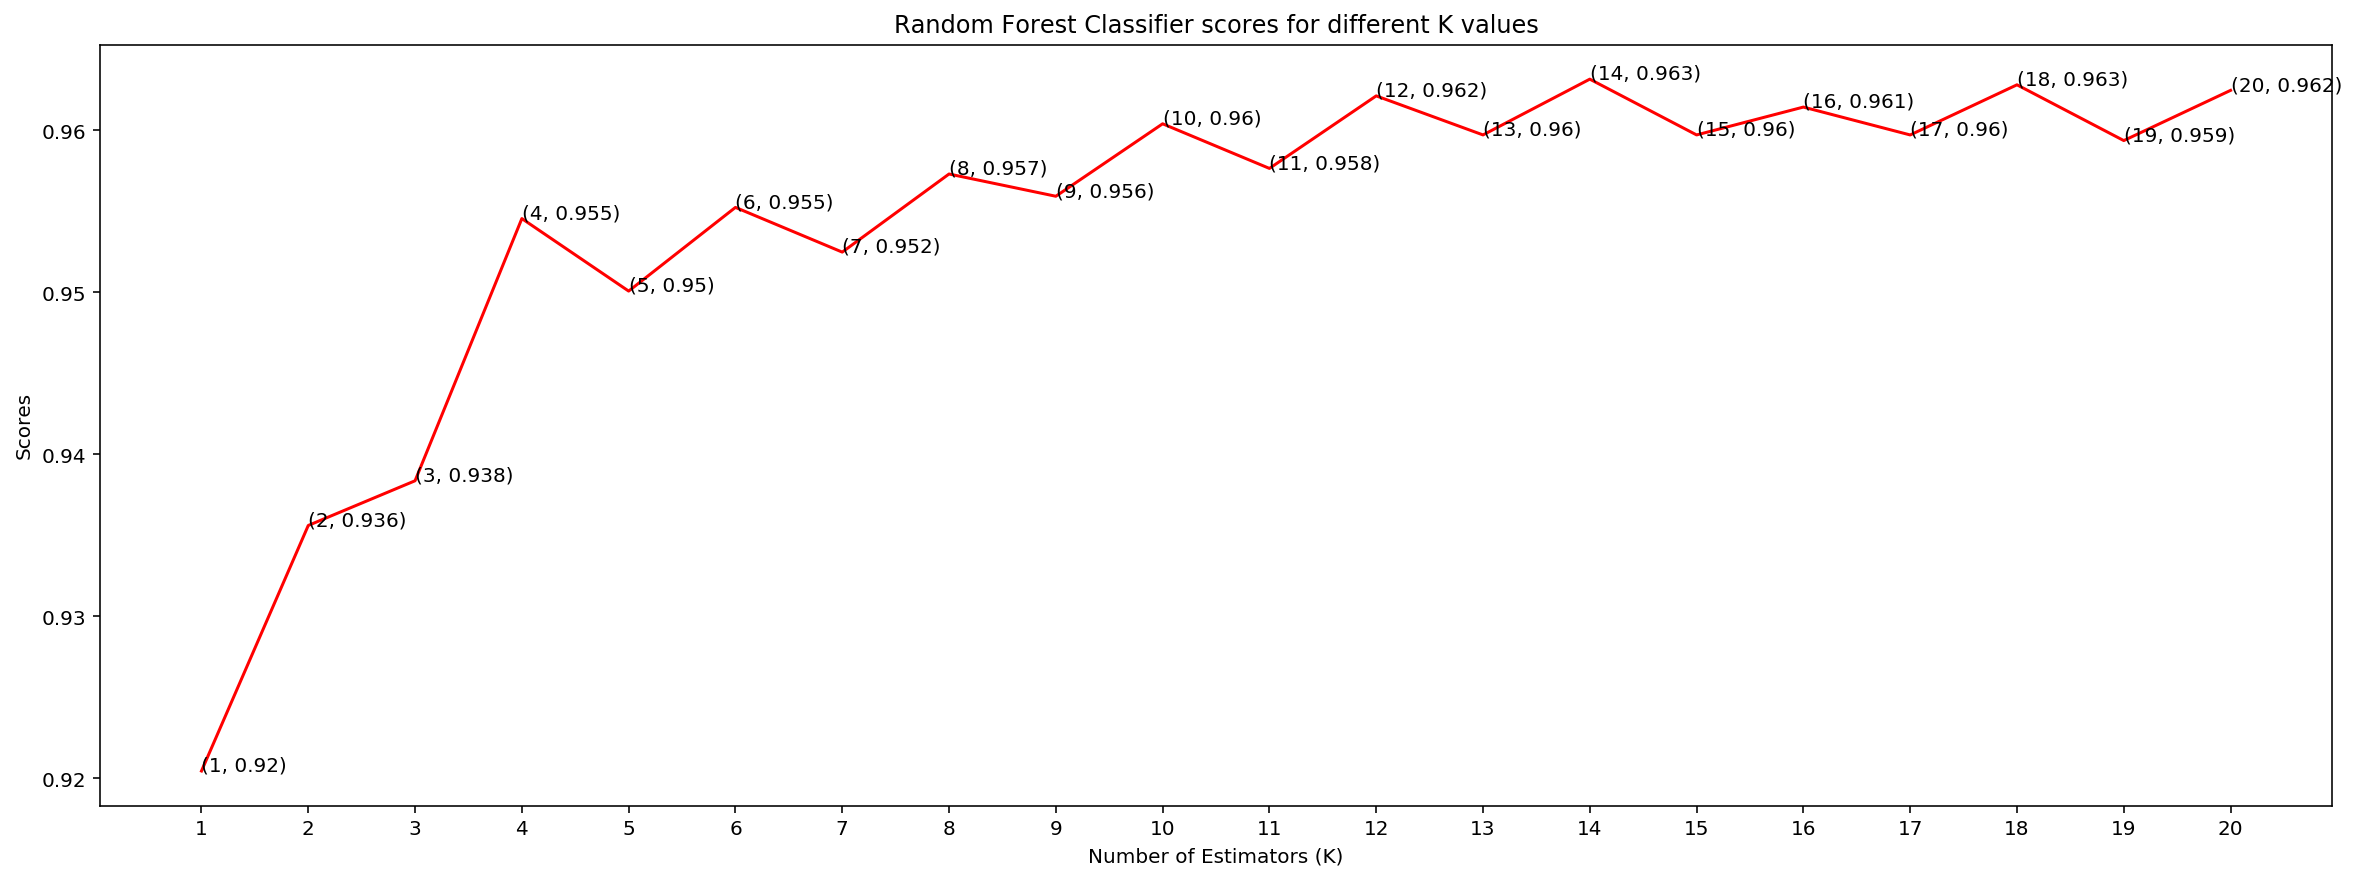

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc_scores = []
for k in range(1,21):
    randomforest_classifier= RandomForestClassifier(n_estimators=k,random_state=0)
    score=cross_val_score(randomforest_classifier,X,y,cv=10)
    rfc_scores.append(score.mean())
plt.figure(figsize =(20,7))
plt.plot([k for k in range(1, 21)], rfc_scores, color = 'red')
for i in range(1,21):
    plt.text(i, rfc_scores[i-1], (i, round(rfc_scores[i-1],3)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Estimators (K)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different K values')

As we can see from the graph accuracy is maximum at k =14. Hence we will be selecting **n_estimators**=14.

In [179]:
randomforest_classifier= RandomForestClassifier(n_estimators=14,random_state=0)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
print('% Accuracy :', round(score.mean()*100,4))

% Accuracy : 96.3159


We have achieved an accuracy of about **96.3%** using Random Forest Classifier. Using Hyper Parameter Tuning we can try to achieve better accuracy.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.33, random_state=42)